# Data Challenge 2 - Data Cleaning and Plotting

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Public Attitude Survey - preparation, exploration, cleaning, plotting

### Non granular PAS

In [5]:
pas_df = pd.read_csv(r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\Data-Challenge-2-JBG050\Data\PAS_Dashboard_Borough.csv")
pas_df

Date Survey               Borough            Measure Proportion  \
0     31/12/2014    PAS  Barking and Dagenham   "Good Job" local       0,56   
1     31/12/2014    PAS                Barnet   "Good Job" local       0,67   
2     31/12/2014    PAS                Bexley   "Good Job" local       0,72   
3     31/12/2014    PAS                 Brent   "Good Job" local       0,66   
4     31/12/2014    PAS               Bromley   "Good Job" local       0,71   
...          ...    ...                   ...                ...        ...   
9307  31/12/2023    PAS                Sutton  Understand issues       0,66   
9308  31/12/2023    PAS         Tower Hamlets  Understand issues       0,55   
9309  31/12/2023    PAS        Waltham Forest  Understand issues       0,39   
9310  31/12/2023    PAS            Wandsworth  Understand issues       0,56   
9311  31/12/2023    PAS   City of Westminster  Understand issues       0,67   

       MPS  Unnamed: 6  Unnamed: 7 Unnamed: 8 Unnamed: 9  
0     0,67         NaN         NaN        NaN        NaN  
1     0,67         NaN         NaN        NaN        NaN  
2     0,67         NaN         NaN        NaN        NaN  
3     0,67         NaN         NaN        NaN        NaN  
4     0,67         NaN         NaN        NaN        NaN  
...    ...         ...         ...        ...        ...  
9307  0,57         NaN         NaN        NaN        NaN  
9308  0,57         NaN         NaN        NaN        NaN  
9309  0,57         NaN         NaN        NaN        NaN  
9310  0,57         NaN         NaN        NaN        NaN  
9311  0,57         NaN         NaN        NaN        NaN  

[9312 rows x 10 columns]

In [6]:
# Convert 'Date' to datetime
pas_df['Date'] = pd.to_datetime(pas_df['Date'])
pas_df.head(2)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3104\429014216.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pas_df['Date'] = pd.to_datetime(pas_df['Date'])


Date Survey               Borough           Measure Proportion   MPS  \
0 2014-12-31    PAS  Barking and Dagenham  "Good Job" local       0,56  0,67   
1 2014-12-31    PAS                Barnet  "Good Job" local       0,67  0,67   

   Unnamed: 6  Unnamed: 7 Unnamed: 8 Unnamed: 9  
0         NaN         NaN        NaN        NaN  
1         NaN         NaN        NaN        NaN

In [7]:
# Extract the year from the 'Month' datetime column
pas_df['Year'] = pas_df['Date'].dt.year
pas_df.head(2)

Date Survey               Borough           Measure Proportion   MPS  \
0 2014-12-31    PAS  Barking and Dagenham  "Good Job" local       0,56  0,67   
1 2014-12-31    PAS                Barnet  "Good Job" local       0,67  0,67   

   Unnamed: 6  Unnamed: 7 Unnamed: 8 Unnamed: 9  Year  
0         NaN         NaN        NaN        NaN  2014  
1         NaN         NaN        NaN        NaN  2014

In [8]:
pas_df_2014 = pas_df[pas_df.Year == 2014]
pas_df_2014

Date Survey               Borough            Measure Proportion  \
0   2014-12-31    PAS  Barking and Dagenham   "Good Job" local       0,56   
1   2014-12-31    PAS                Barnet   "Good Job" local       0,67   
2   2014-12-31    PAS                Bexley   "Good Job" local       0,72   
3   2014-12-31    PAS                 Brent   "Good Job" local       0,66   
4   2014-12-31    PAS               Bromley   "Good Job" local       0,71   
..         ...    ...                   ...                ...        ...   
219 2014-12-31    PAS                Sutton  Understand issues       0,79   
220 2014-12-31    PAS         Tower Hamlets  Understand issues       0,63   
221 2014-12-31    PAS        Waltham Forest  Understand issues       0,79   
222 2014-12-31    PAS            Wandsworth  Understand issues       0,71   
223 2014-12-31    PAS   City of Westminster  Understand issues       0,77   

      MPS  Unnamed: 6  Unnamed: 7 Unnamed: 8 Unnamed: 9  Year  
0    0,67         NaN         NaN        NaN        NaN  2014  
1    0,67         NaN         NaN        NaN        NaN  2014  
2    0,67         NaN         NaN        NaN        NaN  2014  
3    0,67         NaN         NaN        NaN        NaN  2014  
4    0,67         NaN         NaN        NaN        NaN  2014  
..    ...         ...         ...        ...        ...   ...  
219  0,72         NaN         NaN        NaN        NaN  2014  
220  0,72         NaN         NaN        NaN        NaN  2014  
221  0,72         NaN         NaN        NaN        NaN  2014  
222  0,72         NaN         NaN        NaN        NaN  2014  
223  0,72         NaN         NaN        NaN        NaN  2014  

[224 rows x 11 columns]

In [9]:
pas_df_2014.Measure.value_counts()

Measure
"Good Job" local         32
Contact ward officer     32
Informed local           32
Listen to concerns       32
Relied on to be there    32
Treat everyone fairly    32
Understand issues        32
Name: count, dtype: int64

In [10]:
# keeping "Good Job" local for now
pas_df_2014 = pas_df_2014[pas_df_2014.Measure == '"Good Job" local']

### Granular PAS

value count checks

In [11]:
df_gpas_15_17[['Q131', 'Q133']].value_counts()

NameError: name 'df_gpas_15_17' is not defined

In [874]:
df_gpas_17_18[['Q131', 'Q133']].value_counts()

Q131                  Q133                
Fairly well informed  Fairly well informed    4086
Not at all informed   Fairly well informed    3746
                      Not at all informed     2877
Fairly well informed  Very well informed       441
                      Not at all informed      435
Not at all informed   Very well informed       321
Very well informed    Fairly well informed     317
                      Very well informed       273
                      Not at all informed       47
Name: count, dtype: int64

In [875]:
df_gpas_18_19[['Q131', 'Q133']].value_counts()

Q131                  Q133                
Not at all informed   Fairly well informed    4130
Fairly well informed  Fairly well informed    3461
Not at all informed   Not at all informed     3387
Fairly well informed  Not at all informed      461
Not at all informed   Very well informed       321
Fairly well informed  Very well informed       281
Very well informed    Fairly well informed     254
                      Very well informed       171
                      Not at all informed       43
Name: count, dtype: int64

In [876]:
df_gpas_19_20[['Q131', 'Q133']].value_counts()

Q131                  Q133                
Not at all informed   Fairly well informed    3856
                      Not at all informed     3525
Fairly well informed  Fairly well informed    3256
                      Not at all informed      438
                      Very well informed       237
Not at all informed   Very well informed       224
Very well informed    Fairly well informed     213
                      Very well informed       179
                      Not at all informed       29
Name: count, dtype: int64

In [887]:
df_gpas_20_21[['Q131', 'Q133']].value_counts()

Q131                  Q133                
Not at all informed   Not at all informed     3687
Fairly well informed  Fairly well informed    3395
Not at all informed   Fairly well informed    2964
Fairly well informed  Not at all informed      703
Very well informed    Very well informed       571
                      Fairly well informed     456
Fairly well informed  Very well informed       297
Not at all informed   Very well informed       142
Very well informed    Not at all informed      133
Name: count, dtype: int64

In [1]:
## specify paths to pas data on your PC, and the following code will run the cleaning, aggregating and plotting functions

In [888]:
path_15_17 = "C:\Users\Usuario\Desktop\TUE\Data Challenge 2\Data-Challenge-2-JBG050\Data\pas_data_ward_level/PAS_ward_level_FY_15_17.csv"
path_17_18 = "C:\Users\Usuario\Desktop\TUE\Data Challenge 2\Data-Challenge-2-JBG050\Data\pas_data_ward_level/PAS_ward_level_FY_17_18.csv"
path_18_19 = "C:\Users\Usuario\Desktop\TUE\Data Challenge 2\Data-Challenge-2-JBG050\Data\pas_data_ward_level/PAS_ward_level_FY_18_19.csv"
path_19_20 = "C:\Users\Usuario\Desktop\TUE\Data Challenge 2\Data-Challenge-2-JBG050\Data\pas_data_ward_level/PAS_ward_level_FY_10_20.csv"
path_20_21 = "C:\Users\Usuario\Desktop\TUE\Data Challenge 2\Data-Challenge-2-JBG050\Data\pas_data_ward_level/PAS_ward_level_FY_20_21.csv"


df_gpas_15_17 = pd.read_csv(path_15_17)
df_gpas_17_18 = pd.read_csv(path_17_18)
df_gpas_18_19 = pd.read_csv(path_18_19)
df_gpas_19_20 = pd.read_csv(path_19_20)
df_gpas_20_21 = pd.read_csv(path_20_21)

dfs = [
       df_gpas_15_17, 
       df_gpas_17_18, 
       df_gpas_18_19, 
       df_gpas_19_20, 
       df_gpas_20_21
      ]

/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_53874/4026036927.py:8: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,35,177,410,411,412,415,416,417,418,419,420,421,422,423) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gpas_15_17 = pd.read_csv(path_15_17)
/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_53874/4026036927.py:9: DtypeWarning: Columns (30,31,32,98,99,100,101,102,103,104,105,125,126,127,199,200) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gpas_17_18 = pd.read_csv(path_17_18)
/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_53874/4026036927.py:10: DtypeWarning: Columns (25,26,27,28,108,109,110,112,113,137,202,203,381) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gpas_18_19 = pd.read_csv(path_18_19)
/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_53874/4026036927.py:11: DtypeWarning: Columns (41,42,43,131,132,133,213,214,435,44

In [1059]:
sum = 0
for df in dfs:
    print(df.shape)
    sum += df.shape[0]
print(sum)

(25676, 473)
(12808, 404)
(12811, 425)
(12367, 489)
(12736, 150)
76398


In [889]:
# these datasets have these columns
## double hashtag means column has been discarded after some extra thought

def clean_df_1517_1718_1920(df):
    if 'Unnamed: 0' in df.columns:
        df_cleaned = df.drop('Unnamed: 0', axis=1)
    columns_to_keep = [
        'interview_date',
        'MONTH',
        # 'FinancialYear',
        'ward',
        'ward_unique',
        # 'SOA1',
        # 'SOA2',
        'BOROUGHNEIGHBOURHOOD',
        ## 'quarter',
        ## 'Quarter1.1',
        'C2', # borough
        'Q1', # how long lived there
        'XQ135r', # female/male...
        'Q136r', # age range
        'Q139r', # employment
        # 'NQ146', # education
        'Q131',
        'Q133',
        'Q144', # housing situation
        'NQ147r', # race
        # 'NQ155r', # country of origin
        # 'NQ149r', #religion
        'Q150r', #sexual orientation
    ]
    df_cleaned = df_cleaned[columns_to_keep]
    df_cleaned = df_cleaned.rename(columns={'MONTH':'month', 
                       'FinancialYear':'financial_year',
                       'BOROUGHNEIGHBOURHOOD':'borough_neighbourghood',
                       'Quarter1.1':'quarter_1_1',
                       'C2':'borough',
                       'Q1': 'how_long_in_area',
                       'XQ135':'gender',
                       'Q136r':'age',
                       'Q144':'housing_situation',
                       'Quarter':'quarter',
                       'XQ135r':'gender', 
                       'Q139r':'employment', 
                       'NQ147r':'race', 
                       'Q150r':'sexual_orientation'})
    
    # Extract the numerical part and the date part
    df_cleaned['month_nr'] = df_cleaned['month'].str.extract(r'(\d+)')[0]
    df_cleaned['date_str'] = df_cleaned['month'].str.extract(r'\((.*?)\)')[0]
    df_cleaned['date_datetime'] = pd.to_datetime(df_cleaned['date_str'], format='%b %Y')
    
    # Extract year and month from the datetime
    df_cleaned['year'] = df_cleaned['date_datetime'].dt.year
    df_cleaned['month'] = df_cleaned['date_datetime'].dt.month

    df_cleaned.drop('date_str', axis=1, inplace=True)


    return df_cleaned

In [890]:
def clean_df_2021(df):
    if 'Unnamed: 0' in df.columns:
        df_cleaned = df.drop('Unnamed: 0', axis=1)
    columns_to_keep = [
        'interview_date',
        'MONTH',
        # 'FinancialYear',
        'ward',
        'ward_unique',
        # 'SOA1',
        # 'SOA2',
        'BOROUGHNEIGHBOURHOOD',
        ## 'Quarter',
        ## 'Quarter1.1',
        'Borough', # ex C2
        'Q1', # how long lived there
        'ReXQ135', # female/male...
        'ReQ136', # age range
        'ReQ139', # employment
        # 'NQ146', # education
        'Q131',
        'Q133',
        'Q144', # housing situation
        'ReNQ147', # race
        # 'NQ155r', # country of origin
        # 'NQ149r', #religion
        'ReQ150', #sexual orientation
    ]
    df_cleaned = df_cleaned[columns_to_keep]
    df_cleaned = df_cleaned.rename(columns={'MONTH':'month', 
                       'FinancialYear':'financial_year',
                       'BOROUGHNEIGHBOURHOOD':'borough_neighbourghood',
                       'Quarter1.1':'quarter_1_1',
                       'Borough':'borough',
                       'Q1': 'how_long_in_area',
                       'ReXQ135':'gender',
                       'ReQ136':'age',
                       'Q144':'housing_situation',
                       'Quarter':'quarter',
                       'ReXQ135':'gender', 
                       'ReQ139':'employment', 
                       'ReNQ147':'race', 
                       'ReQ150':'sexual_orientation'})

    # Extract the numerical part and the date part
    df_cleaned['month_nr'] = df_cleaned['month'].str.extract(r'(\d+)')[0]
    df_cleaned['date_str'] = df_cleaned['month'].str.extract(r'\((.*?)\)')[0]
    df_cleaned['date_datetime'] = pd.to_datetime(df_cleaned['date_str'], format='%b %Y')
    
    # Extract year and month from the datetime
    df_cleaned['year'] = df_cleaned['date_datetime'].dt.year
    df_cleaned['month'] = df_cleaned['date_datetime'].dt.month

    df_cleaned.drop('date_str', axis=1, inplace=True)

    return df_cleaned

#### Understainding which columns from previous years are also in 20-21

In [260]:
columns_to_keep = [
        'interview_date',
        'MONTH',
        'FinancialYear',
        'ward',
        'ward_unique',
        'SOA1',
        'SOA2',
        'BOROUGHNEIGHBOURHOOD',
        'Quarter',
        'Quarter1.1',
        'C2', # borough
        'Q1', # how long lived there
        'XQ135r', # female/male...
        'Q136r', # age range
        'Q139r', # employment
        'NQ146', # education
        'Q144', # housing situation
        'NQ147r', # race
        'NQ155r', # country of origin
        'NQ149r', # religion
        'Q150r', #sexual orientation
    ]

for i in columns_to_keep:
    if i in df_gpas_20_21.columns:
        continue
    else:
        print(f'column {i} not in df :(')

column SOA1 not in df :(
column SOA2 not in df :(
column quarter not in df :(
column C2 not in df :(
column XQ135r not in df :(
column Q136r not in df :(
column Q139r not in df :(
column NQ146 not in df :(
column NQ147r not in df :(
column NQ155r not in df :(
column NQ149r not in df :(
column Q150r not in df :(


```plaintext
XXX column SOA1 not in df :(
XXX column SOA2 not in df :(
V column quarter not in df :( --> Quarter
V column C2 not in df :( --> Borough
V column XQ135r not in df :( --> ReXQ135
V column Q136r not in df :( --> ReQ136	
V column Q139r not in df :( --> ReQ139
XXX column NQ146 not in df :(
V column NQ147r not in df :( --> 'ReNQ147'
XXX column NQ155r not in df :(
XXX column NQ149r not in df :(
V column Q150r not in df :( --> 'ReQ150'

#### Back to cleaning

#### Opening single dfs (stored in dictionary)

In [370]:
cleaned_dfs_dict['15_17'].head(2)

interview_date  month       ward  \
0    1.364783e+10      4  E05009388   
1    1.364783e+10      4  E05009388   

                                         ward_unique  \
0  Abingdon - Kensington and Chelsea             ...   
1  Abingdon - Kensington and Chelsea             ...   

                       borough_neighbourghood     quarter  quarter_1_1  \
0  Kensington and Chelsea - Kensington         Quarter 41           41   
1  Kensington and Chelsea - Kensington         Quarter 41           41   

                  borough                how_long_in_area  gender  Q136r  \
0  Kensington and Chelsea  5 years but less than 10 years  Female  35-44   
1  Kensington and Chelsea                30 years or more  Female  25-34   

   employment                  Q131                  Q133   housing_situation  \
0  Working FT  Fairly well informed  Fairly well informed  Buying on mortgage   
1  Working FT   Not at all informed  Fairly well informed  Buying on mortgage   

            race sexual_orientation month_nr date_datetime  year  
0  White British       Heterosexual       49    2015-04-01  2015  
1  White British       Heterosexual       49    2015-04-01  2015

In [371]:
cleaned_dfs_dict['17_18'].head(2)

interview_date  month                         ward  \
0    1.372257e+10      8  E05000098                     
1    1.371902e+10      7  E05000100                     

                                         ward_unique  \
0  Queens Park - Brent                           ...   
1  Stonebridge - Brent                           ...   

                              borough_neighbourghood  \
0  Brent - Kilburn                               ...   
1  Brent - Harlsden                              ...   

                                             quarter  quarter_1_1 borough  \
0  Quarter 50                                    ...           50   Brent   
1  Quarter 50                                    ...           50   Brent   

                  how_long_in_area gender  Q136r  employment  \
0   5 years but less than 10 years   Male  45-54  Unemployed   
1  20 years but less than 30 years   Male  45-54  Unemployed   

                   Q131                  Q133  \
0   Not at all informed    Very well informed   
1  Fairly well informed  Fairly well informed   

                 housing_situation           race sexual_orientation month_nr  \
0  Rented from Housing Association  White British       Heterosexual       77   
1                   Owned outright  White British       Heterosexual       76   

  date_datetime  year  
0    2017-08-01  2017  
1    2017-07-01  2017

In [372]:
cleaned_dfs_dict['18_19'].head(2)

interview_date  month       ward  \
0    1.374278e+10      4  E05009396   
1    1.374261e+10      4  E05009394   

                                         ward_unique  \
0  Golborne - Kensington and Chelsea             ...   
1  Dalgarno - Kensington and Chelsea             ...   

                       borough_neighbourghood     quarter  quarter_1_1  \
0  Kensington and Chelsea - Notting Hill       Quarter 53           53   
1  Kensington and Chelsea - Notting Hill       Quarter 53           53   

                  borough                 how_long_in_area  gender  \
0  Kensington and Chelsea  10 years but less than 20 years    Male   
1  Kensington and Chelsea                 30 years or more  Female   

        Q136r  employment                  Q131                Q133  \
0       35-44  Working FT  Fairly well informed  Very well informed   
1  65 or over     Retired   Not at all informed  Very well informed   

                 housing_situation   race sexual_orientation month_nr  \
0  Rented from Housing Association  Black       Heterosexual       85   
1              Rented from Council  Asian       Heterosexual       85   

  date_datetime  year  
0    2018-04-01  2018  
1    2018-04-01  2018

In [373]:
clean_20_21.head(2)

interview_date  month                         ward  \
0    1.380534e+10      4  E05000040                     
1    1.380516e+10      4  E05000044                     

                                         ward_unique  \
0  Valence - Barking and Dagenham                ...   
1  Burnt Oak - Barnet                            ...   

                              borough_neighbourghood               quarter  \
0  Barking and Dagenham - Whalebone              ...  61 Quarter 1 2020/21   
1  Barnet - Colindale                            ...  61 Quarter 1 2020/21   

   quarter_1_1             borough               how_long_in_area  gender  \
0           61  Barking & Dagenham  3 years but less than 5 years    Male   
1           61              Barnet               30 years or more  Female   

        age                      employment                 Q131  \
0  25 to 34  Full time (31+ hours per week)  Not at all informed   
1  55 to 64  Full time (31+ hours per week)  Not at all informed   

                   Q133    housing_situation           race  \
0  Fairly well informed  Rented from Council  White British   
1   Not at all informed       Owned outright          Black   

  sexual_orientation month_nr date_datetime  year  
0       Heterosexual      109    2020-04-01  2020  
1       Heterosexual      109    2020-04-01  2020

#### Aplying cleaning functions and concatenating

In [969]:
clean_20_21 = clean_df_2021(df_gpas_20_21)

In [970]:
from functools import reduce

dfs_before_20_21 = [
       df_gpas_15_17, 
       df_gpas_17_18, 
       df_gpas_18_19, 
       df_gpas_19_20
      ]

cleaned_dfs = map(clean_df_1517_1718_1920, dfs_before_20_21)

cleaned_dfs_dict = dict()

years = ['15_17', '17_18', '18_19', '19_20']
for year, df in zip(years, cleaned_dfs):
    cleaned_dfs_dict[year] = df

dfs_list = [clean_20_21]
dfs_list2 = [cleaned_dfs_dict[year] for year in years]

dfs_list.extend(dfs_list2) # not append cause then we have nested lists

concatenated_df = reduce(lambda x,y: pd.concat([x,y], ignore_index=True), dfs_list)

In [971]:
concatenated_df_17_20 = concatenated_df[(concatenated_df['year'] >= 2017) & (concatenated_df['year'] <= 2020)]

In [972]:
concatenated_df_17_20.shape

(48691, 18)

In [973]:
concatenated_df_17_20.isna().sum()/len(concatenated_df_17_20)

interview_date            0.000000
month                     0.000000
ward                      0.000000
ward_unique               0.000000
borough_neighbourghood    0.000000
borough                   0.000000
how_long_in_area          0.000842
gender                    0.001109
age                       0.002752
employment                0.005052
Q131                      0.014130
Q133                      0.015958
housing_situation         0.024666
race                      0.010310
sexual_orientation        0.017847
month_nr                  0.000000
date_datetime             0.000000
year                      0.000000
dtype: float64

In [974]:
concatenated_17_20_no_nan = concatenated_df_17_20.dropna()

In [975]:
concatenated_17_20_no_nan.shape

(45241, 18)

In [976]:
concatenated_17_20_no_nan.head(2)

interview_date  month                         ward  \
0    1.380534e+10      4  E05000040                     
1    1.380516e+10      4  E05000044                     

                                         ward_unique  \
0  Valence - Barking and Dagenham                ...   
1  Burnt Oak - Barnet                            ...   

                              borough_neighbourghood             borough  \
0  Barking and Dagenham - Whalebone              ...  Barking & Dagenham   
1  Barnet - Colindale                            ...              Barnet   

                how_long_in_area  gender       age  \
0  3 years but less than 5 years    Male  25 to 34   
1               30 years or more  Female  55 to 64   

                       employment                 Q131                  Q133  \
0  Full time (31+ hours per week)  Not at all informed  Fairly well informed   
1  Full time (31+ hours per week)  Not at all informed   Not at all informed   

     housing_situation           race sexual_orientation month_nr  \
0  Rented from Council  White British       Heterosexual      109   
1       Owned outright          Black       Heterosexual      109   

  date_datetime  year  
0    2020-04-01  2020  
1    2020-04-01  2020

In [977]:
# check point
concatenated_17_20_no_nan.to_csv('pas_granular_cleaned_v1.csv', sep=';')

In [978]:
def clean_age(x):
    if ' to ' in x:
        x = x.replace(' to ', '-')
    if ' or over' in x:
        x = x.replace(' or over', '+')
    
    return x  

concatenated_17_20_no_nan['age'] = concatenated_17_20_no_nan['age'].apply(clean_age)

# remove 'Refused' values from age column
## rows where 'age' is 'Refused'
indices_to_drop = concatenated_17_20_no_nan[concatenated_17_20_no_nan['age'] == 'Refused'].index

## drop these rows using the drop method
concatenated_17_20_no_nan = concatenated_17_20_no_nan.drop(indices_to_drop)

/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_53874/3739739694.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concatenated_17_20_no_nan['age'] = concatenated_17_20_no_nan['age'].apply(clean_age)


In [979]:
# clean gender

# remove 'Other' values from gender column
## rows where 'age' is 'Refused'
indices_to_drop = concatenated_17_20_no_nan[concatenated_17_20_no_nan['gender'] == 'Other'].index

## drop these rows using the drop method
concatenated_17_20_no_nan = concatenated_17_20_no_nan.drop(indices_to_drop)

In [980]:
def clean_employment(x):
    if 'Full time (31+ hours per week)' in x:
        return 'Working FT'
    elif 'Part time (up to 30 hours per week)' in x:
        return 'Working PT'
    elif x in 'House Person':
        return 'House person'
    elif 'Student/full time education' in x or 'Student/Education' in x:
        return 'Student'
    elif x in ['Not Working', 'Unemployed', 'Unemployed (registered and not registered)']:
        return 'Not working'
    else:
        return x

# Apply the function to clean employment values
concatenated_17_20_no_nan['employment'] = concatenated_17_20_no_nan['employment'].apply(clean_employment)

# remove "Other"
## rows where 'employemnt' is ^
indices_to_drop = concatenated_17_20_no_nan[concatenated_17_20_no_nan['employment'].isin(["Other"])].index

## drop these rows using the drop method
concatenated_17_20_no_nan = concatenated_17_20_no_nan.drop(indices_to_drop)

In [981]:
# remove "Refused" and "Don't Know" values from age column
## rows where 'employemnt' is ^
indices_to_drop = concatenated_17_20_no_nan[concatenated_17_20_no_nan['employment'].isin(['Refused', "Don't know"])].index

## drop these rows using the drop method
concatenated_17_20_no_nan = concatenated_17_20_no_nan.drop(indices_to_drop)

In [982]:
def clean_sex_orientation(x):
    if x in ['Non-Heterosexual', 'Non-Heterosexual (Gay, Lesbian, Bisexual, None of these)', 'Refused', "Don't know"]:
        return 'Queer'
    else:
        return x

# Apply the function to clean employment values
concatenated_17_20_no_nan['sexual_orientation'] = concatenated_17_20_no_nan['sexual_orientation'].apply(clean_sex_orientation)

In [983]:
def clean_race(x):
    if x in 'Mixed':
        return 'Other'
    if x in 'White Other':
        return 'White'
    if x in 'White British':
        return 'White'
    else:
        return x

# Apply the function to clean employment values
concatenated_17_20_no_nan['race'] = concatenated_17_20_no_nan['race'].apply(clean_race)

# remove "Refused"
## rows where 'employemnt' is ^
indices_to_drop = concatenated_17_20_no_nan[concatenated_17_20_no_nan['race'].isin(["Refused"])].index

## drop these rows using the drop method
concatenated_17_20_no_nan = concatenated_17_20_no_nan.drop(indices_to_drop)

In [984]:
# remove "6"
## rows where 'housing' is ^
indices_to_drop = concatenated_17_20_no_nan[concatenated_17_20_no_nan['housing_situation'].isin(["6", 6])].index

## drop these rows using the drop method
concatenated_17_20_no_nan = concatenated_17_20_no_nan.drop(indices_to_drop)

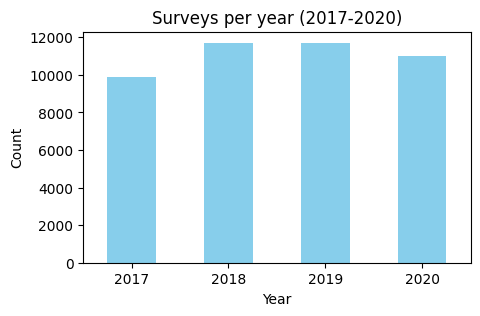

In [985]:
import matplotlib.pyplot as plt

year_counts = concatenated_17_20_no_nan['year'].value_counts()

# Sort the index if necessary (to ensure the histogram follows the year order)
year_counts = year_counts.sort_index()

# Plotting the histogram (bar chart of counts)
year_counts.plot(kind='bar', color='skyblue', figsize=(5, 3))
plt.title('Surveys per year (2017-2020)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotates the x labels to be horizontal
plt.show()

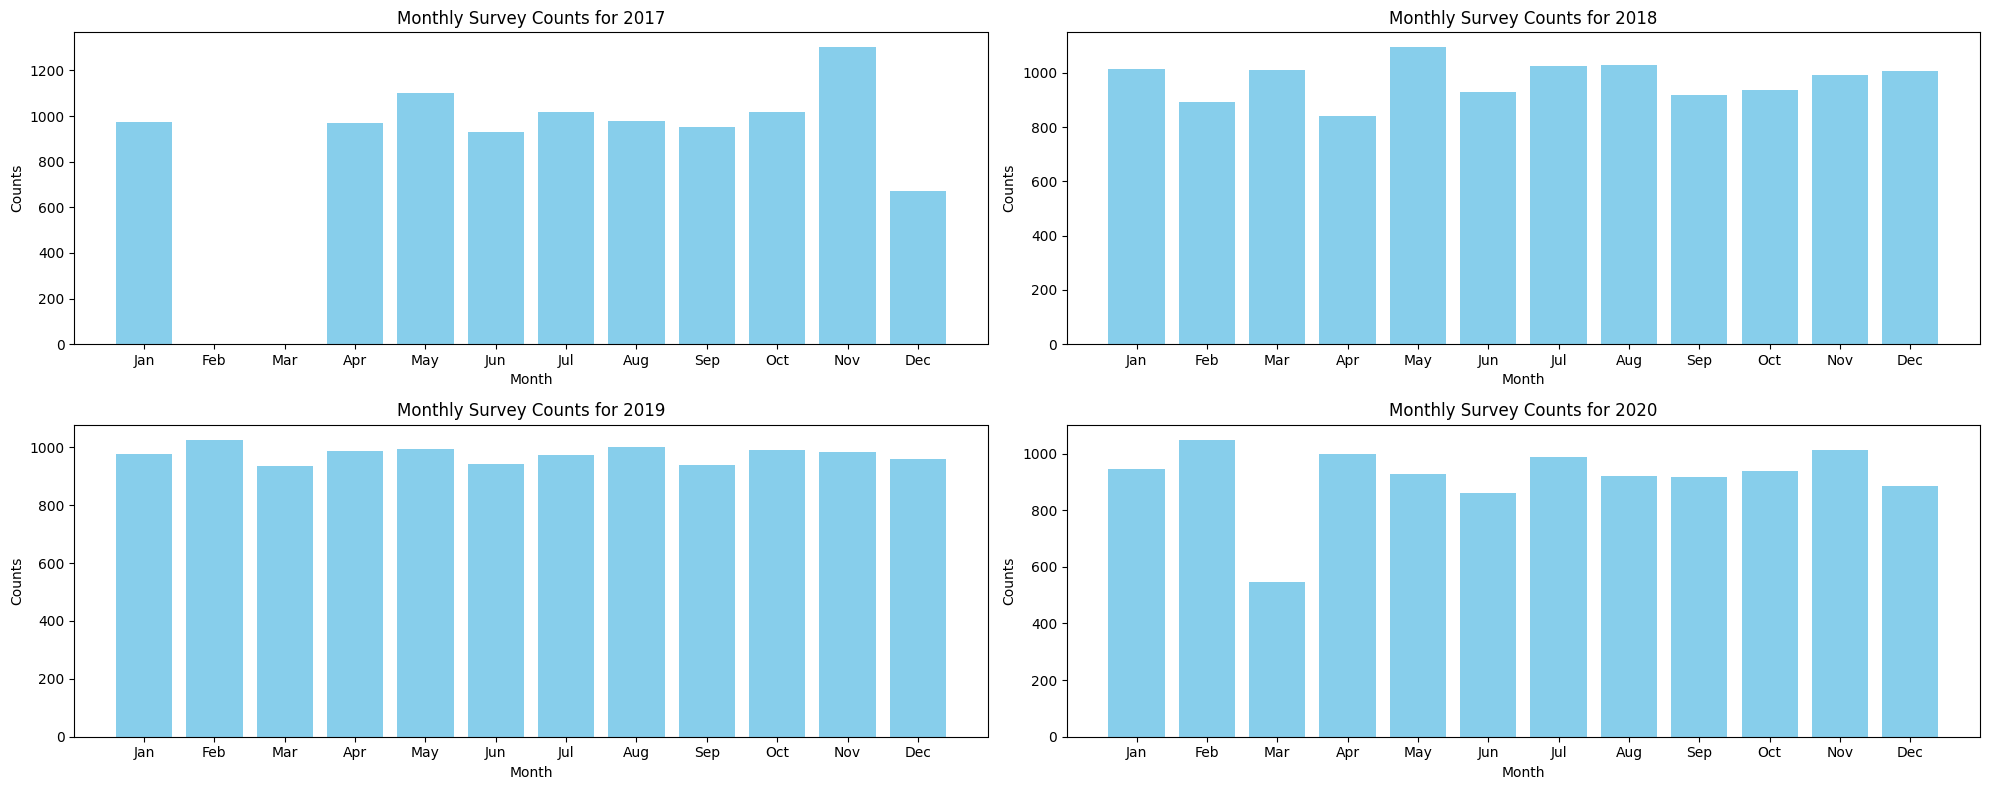

In [986]:
import matplotlib.pyplot as plt
import pandas as pd
import math  # For ceiling calculation

# Calculate group sizes
grouped_data = concatenated_17_20_no_nan.groupby(['year', 'month']).size().reset_index(name='count')

# Get unique years for plotting purposes
years = grouped_data['year'].unique()

# Calculate the number of rows needed for two columns
nrows = math.ceil(len(years) / 2)

# Create a subplot for each year with two columns
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(20, 4 * nrows))  # Adjusted figsize to accommodate two columns

# Ensure axes is iterable and in a flat list
axes = axes.flatten()

# Plot data for each year
for ax, year in zip(axes, years):
    subset = grouped_data[grouped_data['year'] == year]
    
    # Plotting
    ax.bar(subset['month'], subset['count'], color='skyblue')
    ax.set_title(f'Monthly Survey Counts for {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Counts')
    ax.set_xticks(range(1, 13))  # Set x-ticks to be every month
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# If there are more subplots than years, hide the unused axes
for i in range(len(years), len(axes)):
    axes[i].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


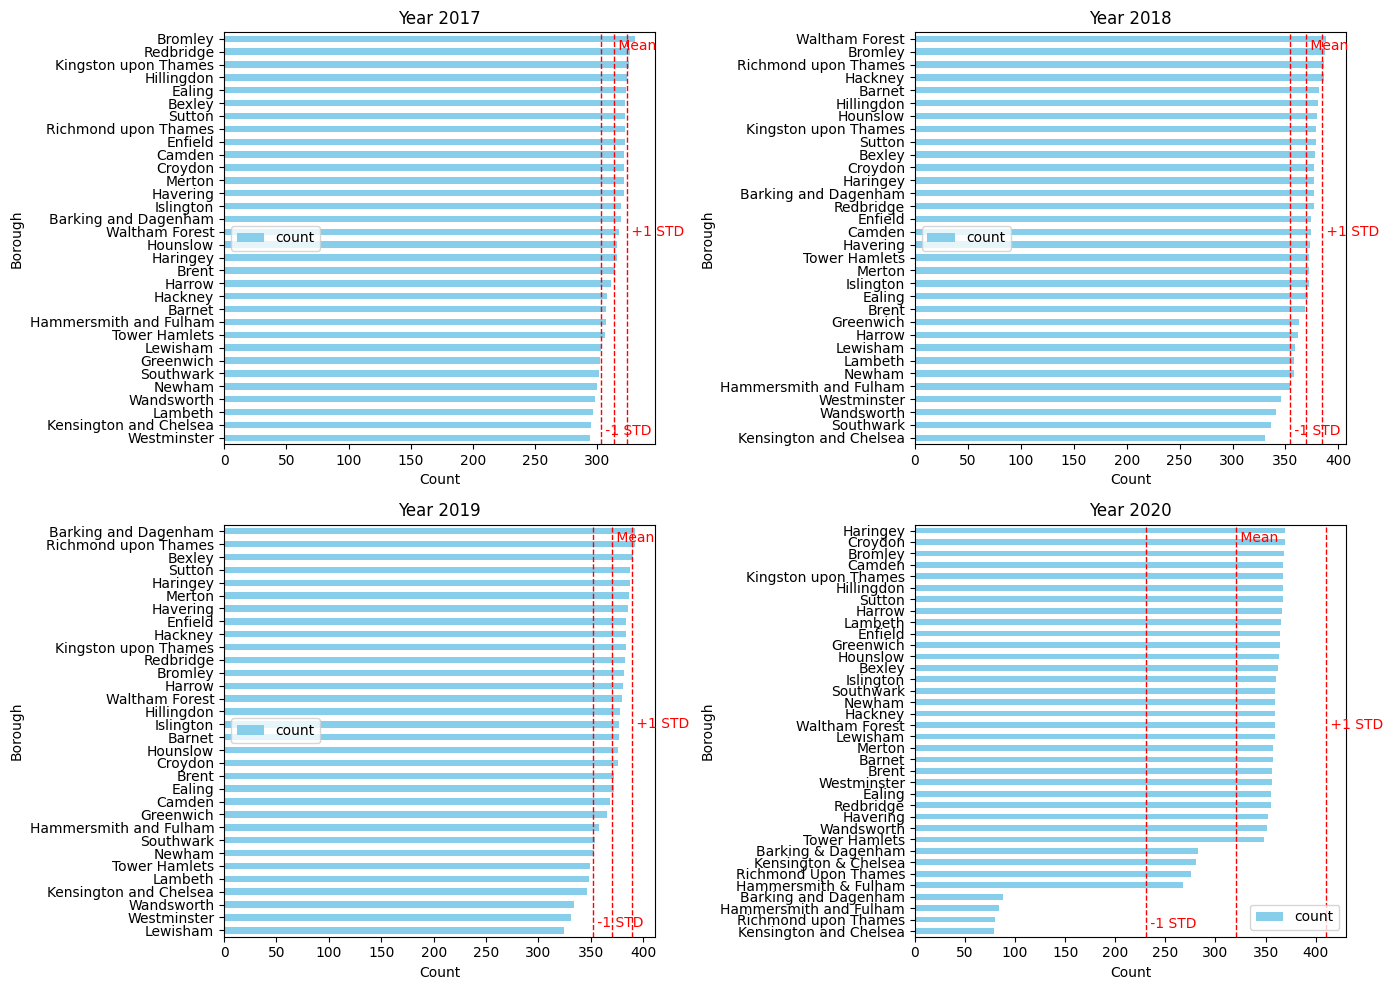

In [1131]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'grouped_counts_df' exists and has been created properly
# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))  # Adjust size as needed
axes = axes.flatten()  # Flatten the axis array for easy iteration

years = [2017, 2018, 2019, 2020]  # List of years we want to plot

# Loop through each year and plot on a separate subplot
for i, year in enumerate(years):
    # Filter the DataFrame for the current year
    df_year = grouped_counts_df[grouped_counts_df['year'] == year]

    # Sort the DataFrame by 'count' for a better order in the plot
    df_year = df_year.sort_values('count', ascending=True)

    # Calculate the mean and standard deviation for the year's counts
    mean_count = df_year['count'].mean()
    std_deviation = df_year['count'].std()
    upper_std = mean_count + std_deviation
    lower_std = mean_count - std_deviation

    # Plotting horizontal bar plot
    ax = axes[i]
    df_year.plot(kind='barh', x='borough', y='count', ax=ax, title=f'Year {year}', color='skyblue')
    ax.set_xlabel('Count')
    ax.set_ylabel('Borough')
    # Make sure the borough labels are readable
    ax.set_yticklabels(df_year['borough'], rotation=0)

    # Add a vertical line for the mean count and standard deviations
    # Color all lines red for consistency
    ax.axvline(x=mean_count, color='red', linestyle='--', linewidth=1)
    ax.text(x=mean_count, y=len(df_year)-1, s=' Mean', color='red', va='top')

    ax.axvline(x=upper_std, color='red', linestyle='--', linewidth=1)
    ax.text(x=upper_std, y=len(df_year)//2, s=' +1 STD', color='red', va='center')

    ax.axvline(x=lower_std, color='red', linestyle='--', linewidth=1)
    ax.text(x=lower_std, y=0, s=' -1 STD', color='red', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


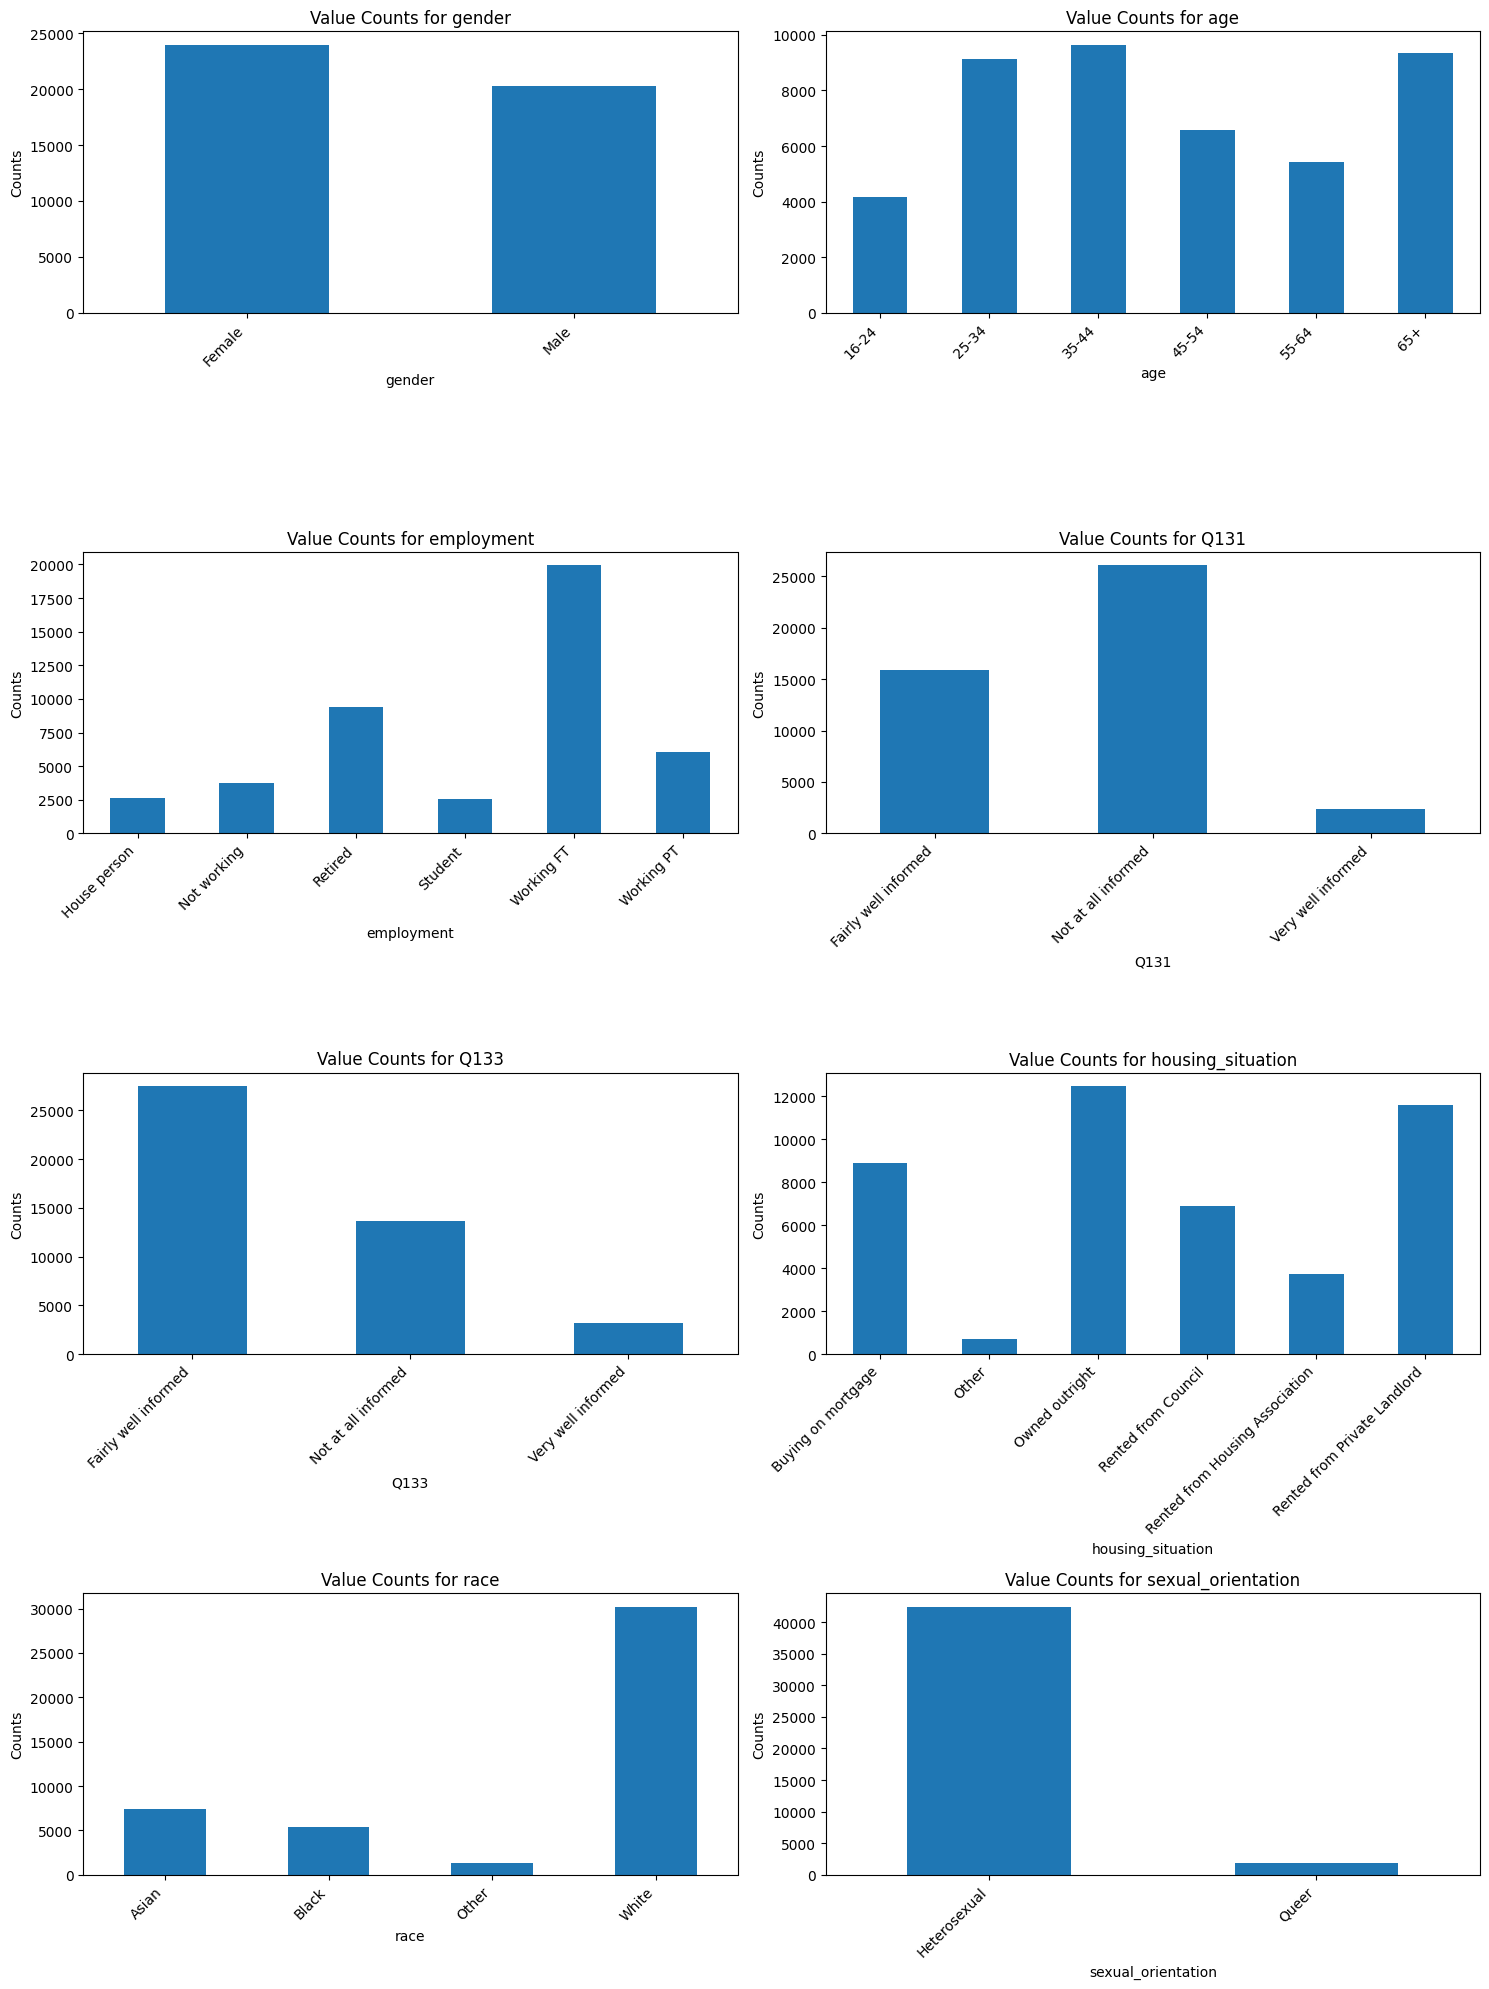

In [1056]:
df = concatenated_17_20_no_nan

columns = ['gender', 'age', 'employment', 'Q131', 'Q133', 'housing_situation', 'race', 'sexual_orientation']

# Create a 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plotting value counts for each column
for ax, column in zip(axes, columns):
    # Get value counts and sort the index
    value_counts = df[column].value_counts().sort_index()
    
    # Plot as bar chart
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title(f'Value Counts for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Counts')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('counts_categorical_features_.jpg', dpi=600)

# Show the plot
plt.show()


In [989]:
concatenated_17_20_no_nan.to_csv('final_granular_pas_clean.csv', sep=';')

In [1020]:
concatenated_17_20_no_nan.borough.unique()

array(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent',
       'Richmond Upon Thames', 'Bromley', 'Camden', 'Croydon', 'Harrow',
       'Ealing', 'Enfield', 'Hackney', 'Hammersmith & Fulham', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Haringey',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Merton',
       'Lambeth', 'Greenwich', 'Newham', 'Redbridge', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Lewisham', 'Kensington and Chelsea',
       'Hammersmith and Fulham', 'Barking and Dagenham',
       'Richmond upon Thames'], dtype=object)

In [1023]:
name_mapping = {
    'Barking & Dagenham': 'Barking and Dagenham',
    'Hammersmith & Fulham': 'Hammersmith and Fulham',
    'Richmond Upon Thames': 'Richmond upon Thames',
    'Kensington & Chelsea': 'Kensington and Chelsea'
}

In [1024]:
concatenated_17_20_no_nan['borough'] = concatenated_17_20_no_nan['borough'].replace(name_mapping)
unique_boroughs = concatenated_17_20_no_nan['borough'].unique()
print(len(unique_boroughs))  # Should print 32 if everything is correct
print(sorted(unique_boroughs))  # To see the sorted list of boroughs

32
['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster']


### Preparation PAS data for regression

In [1049]:
# this has been generated before, it's the cleaned dataframe with all years
# it's created from the section before but you can just loas the data here

#pd.read_csv(...)
concatenated_17_20_no_nan

interview_date  month  \
0        1.380534e+10      4   
1        1.380516e+10      4   
2        1.380508e+10      4   
3        1.380516e+10      4   
4        1.380525e+10      4   
...               ...    ...   
76392    1.380473e+10      3   
76393    1.380491e+10      3   
76394    1.380491e+10      3   
76395    1.380499e+10      3   
76396    1.380473e+10      3   

                                                    ward  \
0                            E05000040                     
1                            E05000044                     
2                            E05000057                     
3                            E05011218                     
4                            E05000101                     
...                                                  ...   
76392  E05000408                                     ...   
76393  E05011462                                     ...   
76394  E05011486                                     ...   
76395  E05011467                                     ...   
76396  E05000036                                     ...   

                                             ward_unique  \
0      Valence - Barking and Dagenham                ...   
1      Burnt Oak - Barnet                            ...   
2      Mill Hill - Barnet                            ...   
3      Belvedere - Bexley                            ...   
4      Sudbury - Brent                               ...   
...                                                  ...   
76392  Grove - Kingston upon Thame                   ...   
76393  Addiscombe East - Croydon                     ...   
76394  Thornton Heath - Croydon                      ...   
76395  Crystal Palace & Upper Norw                   ...   
76396  Mayesbrook - Barking and Da                   ...   

                                  borough_neighbourghood  \
0      Barking and Dagenham - Whalebone              ...   
1      Barnet - Colindale                            ...   
2      Barnet - Colindale                            ...   
3      Bexley - North                                ...   
4      Brent - Wembley                               ...   
...                                                  ...   
76392  Kingston upon Thames - North                  ...   
76393  Croydon - North-East                          ...   
76394  Croydon - North-West                          ...   
76395  Croydon - North-East                          ...   
76396  Barking and Dagenham - Dagenham               ...   

                    borough                 how_long_in_area  gender    age  \
0      Barking and Dagenham    3 years but less than 5 years    Male  25-34   
1                    Barnet                 30 years or more  Female  55-64   
2                    Barnet                 30 years or more    Male    65+   
3                    Bexley  10 years but less than 20 years  Female  55-64   
4                     Brent  10 years but less than 20 years  Female  16-24   
...                     ...                              ...     ...    ...   
76392  Kingston upon Thames    2 years but less than 3 years  Female  35-44   
76393               Croydon                 30 years or more    Male    65+   
76394               Croydon                 30 years or more    Male    65+   
76395               Croydon  10 years but less than 20 years    Male  16-24   
76396  Barking and Dagenham   5 years but less than 10 years  Female  35-44   

       employment                  Q131                  Q133  \
0      Working FT   Not at all informed  Fairly well informed   
1      Working FT   Not at all informed   Not at all informed   
2         Retired  Fairly well informed  Fairly well informed   
3      Working FT  Fairly well informed  Fairly well informed   
4         Student   Not at all informed   Not at all informed   
...           ...                   ...                   ...   
76392  Working FT    Very well informed  Fairly well in

In [1026]:
#keeping only some columns
df_regression = concatenated_17_20_no_nan[['year', 'borough', 'Q131', 'Q133']]
#df_regression= df_regression_age[df_regression_age.age.isin(['16-24','25-34'])]
#df_regression.drop('age', axis=1, inplace=True)
df_regression

year               borough                  Q131                  Q133
0      2020  Barking and Dagenham   Not at all informed  Fairly well informed
1      2020                Barnet   Not at all informed   Not at all informed
2      2020                Barnet  Fairly well informed  Fairly well informed
3      2020                Bexley  Fairly well informed  Fairly well informed
4      2020                 Brent   Not at all informed   Not at all informed
...     ...                   ...                   ...                   ...
76392  2020  Kingston upon Thames    Very well informed  Fairly well informed
76393  2020               Croydon  Fairly well informed  Fairly well informed
76394  2020               Croydon   Not at all informed  Fairly well informed
76395  2020               Croydon   Not at all informed  Fairly well informed
76396  2020  Barking and Dagenham   Not at all informed  Fairly well informed

[44299 rows x 4 columns]

In [1027]:
ordinal_mapping = {
    'Very well informed': 3,
    'Fairly well informed': 2,
    'Not at all informed': 1
}

# Apply the mapping to the columns
df_regression['Q133'] = df_regression['Q133'].replace(ordinal_mapping)
df_regression['Q131'] = df_regression['Q131'].replace(ordinal_mapping)
df_regression

/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_53874/1953458975.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_regression['Q133'] = df_regression['Q133'].replace(ordinal_mapping)
/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_53874/1953458975.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regression['Q133'] = df_regression['Q133'].replace(ordinal_mapping)
/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_53874/1953458975.py:9: FutureWarning: Downcasting behavior in `repl

year               borough  Q131  Q133
0      2020  Barking and Dagenham     1     2
1      2020                Barnet     1     1
2      2020                Barnet     2     2
3      2020                Bexley     2     2
4      2020                 Brent     1     1
...     ...                   ...   ...   ...
76392  2020  Kingston upon Thames     3     2
76393  2020               Croydon     2     2
76394  2020               Croydon     1     2
76395  2020               Croydon     1     2
76396  2020  Barking and Dagenham     1     2

[44299 rows x 4 columns]

In [1031]:
df_regression.groupby(['year', 'borough']).size()

year  borough             
2017  Barking and Dagenham    315
      Barnet                  305
      Bexley                  320
      Brent                   309
      Bromley                 321
                             ... 
2020  Sutton                  352
      Tower Hamlets           328
      Waltham Forest          348
      Wandsworth              338
      Westminster             327
Length: 128, dtype: int64

In [1038]:
d = df_regression.groupby(['year', 'borough']).agg({'Q131':'mean', 'Q133':'mean'}).reset_index()
d

year               borough      Q131      Q133
0    2017  Barking and Dagenham  1.450794  1.644444
1    2017                Barnet  1.534426  1.724590
2    2017                Bexley  1.690625  1.865625
3    2017                 Brent  1.550162  1.919094
4    2017               Bromley  1.538941  1.834891
..    ...                   ...       ...       ...
123  2020                Sutton  1.556818  1.741477
124  2020         Tower Hamlets  1.429878  1.631098
125  2020        Waltham Forest  1.502874  1.750000
126  2020            Wandsworth  1.497041  1.730769
127  2020           Westminster  1.516820  1.733945

[128 rows x 4 columns]

In [1039]:
# Sorting the DataFrame
d.sort_values(by=['borough', 'year'], inplace=True)
d



year               borough      Q131      Q133
0    2017  Barking and Dagenham  1.450794  1.644444
32   2018  Barking and Dagenham  1.408000  1.730667
64   2019  Barking and Dagenham  1.345361  1.574742
96   2020  Barking and Dagenham  1.450142  1.686610
1    2017                Barnet  1.534426  1.724590
..    ...                   ...       ...       ...
126  2020            Wandsworth  1.497041  1.730769
31   2017           Westminster  1.512111  1.792388
63   2018           Westminster  1.538235  1.838235
95   2019           Westminster  1.512346  1.780864
127  2020           Westminster  1.516820  1.733945

[128 rows x 4 columns]

In [1045]:
d['Q131_diff'] = d.groupby('borough')['Q131'].diff()
d['Q133_diff'] = d.groupby('borough')['Q133'].diff()

d = d[d['year'].isin([2018, 2019, 2020])]
d

year               borough      Q131      Q133  Q131_diff  Q133_diff
32   2018  Barking and Dagenham  1.408000  1.730667  -0.042794   0.086222
64   2019  Barking and Dagenham  1.345361  1.574742  -0.062639  -0.155924
96   2020  Barking and Dagenham  1.450142  1.686610   0.104782   0.111867
33   2018                Barnet  1.486842  1.797368  -0.047584   0.072778
65   2019                Barnet  1.438172  1.849462  -0.048670   0.052094
..    ...                   ...       ...       ...        ...        ...
94   2019            Wandsworth  1.387879  1.706061   0.060445   0.006946
126  2020            Wandsworth  1.497041  1.730769   0.109163   0.024709
63   2018           Westminster  1.538235  1.838235   0.026125   0.045848
95   2019           Westminster  1.512346  1.780864  -0.025890  -0.057371
127  2020           Westminster  1.516820  1.733945   0.004474  -0.046919

[96 rows x 6 columns]

In [952]:
df_ky = pd.read_csv('twitter_data_derived.csv')
df_ky_2 = pd.read_csv('twitter_data_pop.csv')

In [953]:
df_ky_2

borough  year  population    like  retweet   reply  \
0    Barking and Dagenham  2017      210513  6029.0   4232.0   838.0   
1    Barking and Dagenham  2018      212773  7368.0   3835.0   622.0   
2    Barking and Dagenham  2019      214858  7377.0   2872.0   502.0   
3    Barking and Dagenham  2020      218367   418.0    134.0    29.0   
4                  Barnet  2017      391446  2962.0   2385.0   268.0   
..                    ...   ...         ...     ...      ...     ...   
123            Wandsworth  2020      332731  2522.0   1140.0   446.0   
124           Westminster  2017      250049  8770.0   6804.0   939.0   
125           Westminster  2018      254375  7480.0   3372.0   577.0   
126           Westminster  2019      258511  7843.0   3365.0   677.0   
127           Westminster  2020      259981  8402.0   2924.0  1297.0   

     post_length  post_type_image  post_type_text  post_type_video  entries  
0     114.767405            374.0           268.0              7.0      649  
1     161.443810            395.0           154.0             16.0      565  
2     164.130064            306.0           139.0             28.0      473  
3     166.400000             24.0            18.0              3.0       45  
4     135.850806            311.0           172.0             15.0      498  
..           ...              ...             ...              ...      ...  
123   191.025229            149.0           228.0             60.0      437  
124   112.665122            345.0           515.0             14.0      874  
125   205.742176            412.0           240.0             21.0      673  
126   204.682540            364.0           177.0             29.0      570  
127   197.545000            213.0           145.0             46.0      404  

[128 rows x 11 columns]

In [954]:
df_ky_2['avg_like'] = df_ky_2['like']/df_ky_2['entries']
df_ky_2['avg_retweet'] = df_ky_2['retweet']/df_ky_2['entries']
df_ky_2['avg_reply'] = df_ky_2['reply']/df_ky_2['entries']


In [1046]:
merged_df = pd.merge(df_ky_2, d, on=['borough', 'year'])

In [1048]:
merged_df.to_csv('df_regression_pas_twitter_q131_133_NO_POP_lags.csv', sep=';')

In [ ]:
# d.to_csv("df_regression_pas_q131_133.csv", sep=';')

### Grouping

In [885]:
df = concatenated_17_20_no_nan.copy()

In [886]:
df[df.borough=='Barnet']

interview_date  month  \
1        1.380516e+10      4   
2        1.380508e+10      4   
18       1.380516e+10      4   
93       1.380542e+10      4   
213      1.380560e+10      4   
...               ...    ...   
76087    1.380292e+10      3   
76088    1.380283e+10      3   
76090    1.380275e+10      3   
76091    1.380275e+10      3   
76390    1.380473e+10      3   

                                                    ward  \
1                            E05000044                     
2                            E05000057                     
18                           E05000045                     
93                           E05000057                     
213                          E05000045                     
...                                                  ...   
76087  E05000047                                     ...   
76088  E05000047                                     ...   
76090  E05000047                                     ...   
76091  E05000047                                     ...   
76390  E05000052                                     ...   

                                             ward_unique  \
1      Burnt Oak - Barnet                            ...   
2      Mill Hill - Barnet                            ...   
18     Childs Hill - Barnet                          ...   
93     Mill Hill - Barnet                            ...   
213    Childs Hill - Barnet                          ...   
...                                                  ...   
76087  Coppetts - Barnet                             ...   
76088  Coppetts - Barnet                             ...   
76090  Coppetts - Barnet                             ...   
76091  Coppetts - Barnet                             ...   
76390  Garden Suburb - Barnet                        ...   

                                  borough_neighbourghood borough  \
1      Barnet - Colindale                            ...  Barnet   
2      Barnet - Colindale                            ...  Barnet   
18     Barnet - Golders Green                        ...  Barnet   
93     Barnet - Colindale                            ...  Barnet   
213    Barnet - Golders Green                        ...  Barnet   
...                                                  ...     ...   
76087  Barnet - Whetstone                            ...  Barnet   
76088  Barnet - Whetstone                            ...  Barnet   
76090  Barnet - Whetstone                            ...  Barnet   
76091  Barnet - Whetstone                            ...  Barnet   
76390  Barnet - Golders Green                        ...  Barnet   

                      how_long_in_area  gender    age    employment  \
1                     30 years or more  Female  55-64    Working FT   
2                     30 years or more    Male    65+       Retired   
18       3 years but less than 5 years  Female  55-64    Working FT   
93     10 years but less than 20 years    Male  25-34    Working FT   
213    10 years but less than 20 years  Female  45-54    Working PT   
...                                ...     ...    ...           ...   
76087    3 years but less than 5 years  Female  55-64    Working FT   
76088   5 years but less than 10 years    Male  55-64    Working FT   
76090              Less than 12 months    Male  25-34  House person   
76091    3 years but less than 5 years    Male  25-34    Working FT   
76390                 30 years or more  Female    65+    Working PT   

                       Q131                  Q133  \
1       Not at all informed   Not at all informed   
2      Fairly well informed  Fairly well informed   
18      Not at all informed  Fairly well informed   
93     Fairly well informed    Very well informed   
213     Not at all informed  Fairly well informed   
...                     ...                   ...   
76087   Not at all informed  Fairly well informed   
76088   Not at all informed   Not at all informed   
76090  Fairly well informed  Fair

In [854]:
df.head(2)

interview_date  month                         ward  \
0    1.380534e+10      4  E05000040                     
1    1.380516e+10      4  E05000044                     

                                         ward_unique  \
0  Valence - Barking and Dagenham                ...   
1  Burnt Oak - Barnet                            ...   

                              borough_neighbourghood             borough  \
0  Barking and Dagenham - Whalebone              ...  Barking & Dagenham   
1  Barnet - Colindale                            ...              Barnet   

                how_long_in_area  gender    age  employment  \
0  3 years but less than 5 years    Male  25-34  Working FT   
1               30 years or more  Female  55-64  Working FT   

                  Q131                  Q133    housing_situation   race  \
0  Not at all informed  Fairly well informed  Rented from Council  White   
1  Not at all informed   Not at all informed       Owned outright  Black   

  sexual_orientation month_nr date_datetime  year  
0       Heterosexual      109    2020-04-01  2020  
1       Heterosexual      109    2020-04-01  2020

In [855]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43022 entries, 0 to 76396
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   interview_date          43022 non-null  float64       
 1   month                   43022 non-null  int32         
 2   ward                    43022 non-null  object        
 3   ward_unique             43022 non-null  object        
 4   borough_neighbourghood  43022 non-null  object        
 5   borough                 43022 non-null  object        
 6   how_long_in_area        43022 non-null  object        
 7   gender                  43022 non-null  object        
 8   age                     43022 non-null  object        
 9   employment              43022 non-null  object        
 10  Q131                    43022 non-null  object        
 11  Q133                    43022 non-null  object        
 12  housing_situation       43022 non-null  object     

In [856]:
ordinal_mapping = {
    'Very well informed': 3,
    'Fairly well informed': 2,
    'Not at all informed': 1
}

# Apply the mapping to the columns
df['Q133'] = df['Q133'].replace(ordinal_mapping)
df['Q131'] = df['Q131'].replace(ordinal_mapping)

/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_53874/3212153816.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q133'] = df['Q133'].replace(ordinal_mapping)
/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_53874/3212153816.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Q131'] = df['Q131'].replace(ordinal_mapping)


In [861]:
def prepare_df_pas(df,
                   columns_to_group_by = ['year', 'gender', 'race', 'borough'], 
                   columns_to_keep = ['year', 'gender', 'race', 'borough', 'Q131', 'Q133']):
    
    df_subselect = df[columns_to_keep]
    
    # Calculate the count for each subgroup
    count_df = df_subselect.groupby(columns_to_group_by).size().reset_index(name='count')
    
    # Calculate the mean for Q131 and Q133
    grouped_df = df_subselect.groupby(columns_to_group_by).agg({'Q131': 'mean', 'Q133': 'mean'}).reset_index()
    grouped_df.rename(columns={'Q131': 'mean_Q131', 'Q133': 'mean_Q133'}, inplace=True)
    
    # Merge count data with grouped data
    grouped_df = pd.merge(grouped_df, count_df, on=columns_to_group_by)
    
    # Get unique years in data
    years = grouped_df['year'].unique()
    
    output_yearly_dfs = {}
    
    for year in years:
        df_one_year = grouped_df[grouped_df['year'] == year]
        
        # Number of instances in each borough one year
        total_surveys_year_borough = df_subselect[df_subselect['year'] == year].groupby(['year', 'borough']).size().reset_index(name='total_surveys_borough')
        
        df_one_year = pd.merge(df_one_year, total_surveys_year_borough, on=['year', 'borough'], how='left')
        df_one_year['proportion_subgroup'] = df_one_year['count'] / df_one_year['total_surveys_borough']


        df_one_year['Q131_Q133_avg'] = (df_one_year['mean_Q131'] + df_one_year['mean_Q133']) / 2

        df_dummies = pd.get_dummies(df_one_year, columns=['gender', 'race', 'borough'], drop_first=True)


        df_one_year_with_dummies = pd.concat([df_one_year, df_dummies], axis=1) 

        
        output_yearly_dfs[str(year)] = df_one_year_with_dummies
        
    
    return output_yearly_dfs

# Example usage:
# df = pd.read_csv('your_data.csv')
# result = prepare_df_pas(df)

In [880]:
x['2018'].shape

(192, 51)

In [862]:
x = prepare_df_pas(df)
x['2017'][x['2017'].borough=='Barnet']

year  gender   race borough  mean_Q131  mean_Q133  count  \
1    2017  Female  Asian  Barnet   1.357143   1.642857     28   
33   2017  Female  Black  Barnet   1.461538   1.692308     13   
64   2017  Female  White  Barnet   1.475410   1.680328    122   
96   2017    Male  Asian  Barnet   1.678571   1.571429     28   
128  2017    Male  Black  Barnet   2.000000   2.000000     10   
160  2017    Male  White  Barnet   1.604396   1.780220     91   

     total_surveys_borough  proportion_subgroup  Q131_Q133_avg  year  \
1                      292             0.095890       1.500000  2017   
33                     292             0.044521       1.576923  2017   
64                     292             0.417808       1.577869  2017   
96                     292             0.095890       1.625000  2017   
128                    292             0.034247       2.000000  2017   
160                    292             0.311644       1.692308  2017   

     mean_Q131  mean_Q133  count  total_surveys_borough  proportion_subgroup  \
1     1.357143   1.642857     28                    292             0.095890   
33    1.461538   1.692308     13                    292             0.044521   
64    1.475410   1.680328    122                    292             0.417808   
96    1.678571   1.571429     28                    292             0.095890   
128   2.000000   2.000000     10                    292             0.034247   
160   1.604396   1.780220     91                    292             0.311644   

     Q131_Q133_avg  gender_Male  race_Black  race_White  borough_Barnet  \
1         1.500000        False       False       False            True   
33        1.576923        False        True       False            True   
64        1.577869        False       False        True            True   
96        1.625000         True       False       False            True   
128       2.000000         True        True       False            True   
160       1.692308         True       False        True            True   

     borough_Bexley  borough_Brent  borough_Bromley  borough_Camden  \
1             False          False            False           False   
33            False          False            False           False   
64            False          False            False           False   
96            False          False            False           False   
128           False          False            False           False   
160           False          False            False           False   

     borough_Croydon  borough_Ealing  borough_Enfield  borough_Greenwich  \
1              False           False            False              False   
33             False           False            False              False   
64             False           False            False              False   
96             False           False            False              False   
128            False           False            False              False   
160            False           False            False              False   

     borough_Hackney  borough_Hammersmith and Fulham  borough_Haringey  \
1              False                           False             False   
33             False                           False             False   
64             False                           False             False   
96             False                           False             False   
128            False                           False             False   
160            False                           False             False   

     borough_Harrow  borough_Havering  borough_Hillingdon  borough_Hounslow  \
1             False             False               False             False   
33            False             False               False             False   
64            False             False               False             False   
96            False             False               False             False   
128         

In [881]:
pas_17 = x['2017']
pas_18 = x['2018']
pas_19 = x['2019']
pas_20 = x['2020']

lst = [pas_17, pas_18, pas_19, pas_20]
years = range(2017,2021)
for df, year in zip(lst, years):
    df.to_csv(f'df_pas_{year}.csv', sep=';')

### Encoding

In [648]:
df.columns

Index(['interview_date', 'month', 'ward', 'ward_unique',
       'borough_neighbourghood', 'borough', 'how_long_in_area', 'gender',
       'age', 'employment', 'Q131', 'Q133', 'housing_situation', 'race',
       'sexual_orientation', 'month_nr', 'date_datetime', 'year'],
      dtype='object')

In [645]:
df = concatenated_17_20_no_nan.copy()

In [647]:
pd.get_dummies(df, columns=['month', 'borough', ])

interview_date  month                         ward  \
0    1.380534e+10      4  E05000040                     
1    1.380516e+10      4  E05000044                     

                                         ward_unique  \
0  Valence - Barking and Dagenham                ...   
1  Burnt Oak - Barnet                            ...   

                              borough_neighbourghood             borough  \
0  Barking and Dagenham - Whalebone              ...  Barking & Dagenham   
1  Barnet - Colindale                            ...              Barnet   

                how_long_in_area  gender    age  employment  \
0  3 years but less than 5 years    Male  25-34  Working FT   
1               30 years or more  Female  55-64  Working FT   

                  Q131                  Q133    housing_situation   race  \
0  Not at all informed  Fairly well informed  Rented from Council  White   
1  Not at all informed   Not at all informed       Owned outright  Black   

  sexual_orientation month_nr date_datetime  year  
0       Heterosexual      109    2020-04-01  2020  
1       Heterosexual      109    2020-04-01  2020

### Granular PAS data - OLD code, not used

In [179]:
path_15_17 = '/Users/giacomograzia/Library/CloudStorage/OneDrive-TUEindhoven/BDS/Y2Q4_Data-challenge-2/GranularDataPAS/pas_data_ward_level/PAS_ward_level_FY_15_17.csv'
path_17_18 = '/Users/giacomograzia/Library/CloudStorage/OneDrive-TUEindhoven/BDS/Y2Q4_Data-challenge-2/GranularDataPAS/pas_data_ward_level/PAS_ward_level_FY_17_18.csv'
path_18_19 = '/Users/giacomograzia/Library/CloudStorage/OneDrive-TUEindhoven/BDS/Y2Q4_Data-challenge-2/GranularDataPAS/pas_data_ward_level/PAS_ward_level_FY_18_19.csv'
path_19_20 = '/Users/giacomograzia/Library/CloudStorage/OneDrive-TUEindhoven/BDS/Y2Q4_Data-challenge-2/GranularDataPAS/pas_data_ward_level/PAS_ward_level_FY_19_20.csv'
path_20_21 = '/Users/giacomograzia/Library/CloudStorage/OneDrive-TUEindhoven/BDS/Y2Q4_Data-challenge-2/GranularDataPAS/pas_data_ward_level/PAS_ward_level_FY_20_21.csv'


df_gpas_15_17 = pd.read_csv(path_15_17)
df_gpas_17_18 = pd.read_csv(path_17_18)
df_gpas_18_19 = pd.read_csv(path_18_19)
df_gpas_19_20 = pd.read_csv(path_19_20)
df_gpas_20_21 = pd.read_csv(path_20_21)

dfs = [
       df_gpas_15_17, 
       df_gpas_17_18, 
       df_gpas_18_19, 
       df_gpas_19_20, 
       df_gpas_20_21
      ]

/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_1656/4026036927.py:8: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,35,177,410,411,412,415,416,417,418,419,420,421,422,423) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gpas_15_17 = pd.read_csv(path_15_17)
/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_1656/4026036927.py:9: DtypeWarning: Columns (30,31,32,98,99,100,101,102,103,104,105,125,126,127,199,200) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gpas_17_18 = pd.read_csv(path_17_18)
/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_1656/4026036927.py:10: DtypeWarning: Columns (25,26,27,28,108,109,110,112,113,137,202,203,381) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gpas_18_19 = pd.read_csv(path_18_19)
/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_1656/4026036927.py:11: DtypeWarning: Columns (41,42,43,131,132,133,213,214,435,444,45

In [199]:
df_gpas_15_17.head(2)

Unnamed: 0  interview_date          MONTH FinancialYear       ward  \
0           1    1.364783e+10  49 (Apr 2015)       2015/16  E05009388   
1           2    1.364783e+10  49 (Apr 2015)       2015/16  E05009388   

                                  ward_n  \
0  Abingdon                                
1  Abingdon                                

                                         ward_unique       SOA1       SOA2  \
0  Abingdon - Kensington and Chelsea             ...  E01002812  E02000589   
1  Abingdon - Kensington and Chelsea             ...  E01002812  E02000589   

                         BOROUGHNEIGHBOURHOOD     quarter  Quarter1.1  \
0  Kensington and Chelsea - Kensington         Quarter 41          41   
1  Kensington and Chelsea - Kensington         Quarter 41          41   

                       C2  NQ1 NQ2A NQ2B NQ2C NQ2D NQ2E NQ2F NQ2G NQ2H NQ2I  \
0  Kensington and Chelsea  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  Kensington and Chelsea  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                               Q1                 Q1D    Q3C    Q3F    Q3G  \
0  5 years but less than 10 years  Increased a little  Agree  Agree  Agree   
1                30 years or more     Increased a lot  Agree  Agree  Agree   

     Q3H       Q3I    Q3J    Q3K               Q3L            Q126DA  \
0  Agree     Agree  Agree  Agree               NaN  Fairly important   
1  Agree  Disagree  Agree    NaN  Tend to disagree  Fairly important   

             Q126DB Q126DC                        NQ7A   NQ7B  \
0  Fairly important    NaN  Neither agree nor disagree  Agree   
1  Fairly important    NaN                       Agree  Agree   

                     Q10A                  Q10B                  Q10C  \
0    Not a problem at all  Not a problem at all  Not a problem at all   
1  Not a very big problem  Not a problem at all  Not a problem at all   

                   Q10D                  Q10E                    Q10F  \
0  Not a problem at all  Not a problem at all  Not a very big problem   
1  Not a problem at all  Not a problem at all      Fairly big problem   

                   Q10H      NQ10A     NQ10BA     NQ10BB     NQ10BC  \
0  Not a problem at all  Not Asked  Not asked  Not asked  Not asked   
1  Not a problem at all  Not Asked  Not asked  Not asked  Not asked   

      NQ10BD     NQ10BE     NQ10BF               Q13 Q14A Q14B Q14C  \
0  Not asked  Not asked  Not asked  Not very worried  NaN  NaN  NaN   
1  Not asked  Not asked  Not asked    Fairly worried    -    -    -   

                             Q14D Q14E               Q15 Q16A Q16B Q16C Q16D  \
0                             NaN  NaN  Not very worried  NaN  NaN  NaN  NaN   
1  What you have seen in the area    -  Not very worried  NaN  NaN  NaN  NaN   

  Q16E       NQ21          Q21       Q54A       Q54B       Q54C         Q54D  \
0  NaN  Not Asked    Very safe  Very safe  Very safe  Very safe    Very safe   
1  NaN  Not Asked  Fairly safe  Very safe  Very safe  Very safe  Fairly safe   

        Q54E                NQ57AA                NQ57AB  \
0  Very safe  Completely satisfied  Completely satisfied   
1        NaN      Fairly satisfied        Very satisfied   

                 NQ57AC NQ57AD NQ57AE                  NNQ27C  \
0  Completely satisfied    NaN    NaN  Not a very big problem   
1      Fairly satisfied    NaN    NaN      Fairly big problem   

                 NNQ27E                   Q37 Q38A Q38B Q38C Q38D Q38E  \
0  Not a problem at all  Not a problem at all  NaN  NaN  NaN  NaN  NaN   
1  Not a problem at all  Not a problem at all  NaN  NaN  NaN  NaN  NaN   

                 Q39A_2 Q39BA Q39BB Q39BC Q39BD Q39BE                  NQ43  \
0  Not a problem at all   NaN   NaN   NaN   NaN   NaN  Not a problem at all   
1  Not a problem at all   NaN   NaN   NaN   NaN   NaN                   NaN   

       NQ44A     NQ44BA     NQ44BB     NQ44BC     NQ44BD     NQ44BE  \
0  Not Asked  Not Asked  Not Asked  Not Asked  Not

<AxesSubplot: >

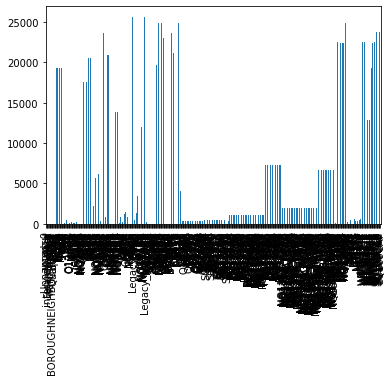

In [197]:
df_gpas_15_17.isna().sum().plot(kind='bar')

In [180]:
df_gpas_17_18.head(1)

Unnamed: 0  interview_date          MONTH  FinancialYear  \
0           1    1.372257e+10  77 (Aug 2017)             13   

                          ward  \
0  E05000098                     

                                              ward_n  \
0  Queens Park                                   ...   

                                             WARD_1  \
0                                                     

                                         ward_unique  \
0  Queens Park - Brent                           ...   

                                              WARD_0  \
0                                                ...   

                          SOA1                         SOA2  \
0  E01000581                    E02000122                     

                                BOROUGHNEIGHBOURHOOD  \
0  Brent - Kilburn                               ...   

                                              BOROU0  \
0                                                ...   

                                              BOROU1  \
0                                                ...   

  BOROUGHNEIGHBOURHOODCODED  \
0           Brent - Kilburn   

                                             quarter  Quarter1.1     C2  \
0  Quarter 50                                    ...          50  Brent   

                               Q1                         Q3C  \
0  5 years but less than 10 years  Neither agree nor disagree   

                          Q3F    Q3G    Q3H                         Q3I  \
0  Neither agree nor disagree  Agree  Agree  Neither agree nor disagree   

     Q3J                         Q3K            Q3L           XQ3A  \
0  Agree  Neither agree nor disagree  Tend to agree  Fairly likely   

            XQ3B   NQ7B                 XQ8 XQ9A XQ9B               Q13 Q14A  \
0  Fairly likely  Agree  Not very confident  NaN  NaN  Not very worried  NaN   

  Q14B Q14C Q14D Q14E               Q15 Q16A Q16B Q16C Q16D Q16E ZQ10A ZQ10B  \
0  NaN  NaN  NaN  NaN  Not very worried  NaN  NaN  NaN  NaN  NaN   NaN   NaN   

  ZQ10C ZQ10D ZQ10E ZQ10F ZQ10H ZNQ10A ZNQ10BA ZNQ10BB ZNQ10BC ZNQ10BD  \
0   NaN   NaN   NaN   NaN   NaN    NaN     NaN     NaN     NaN     NaN   

  ZNQ10BE ZNQ10BF                    NQ21        Q21       Q54A       Q54B  \
0     NaN     NaN  It makes no difference  Very safe  Very safe  Very safe   

          Q54C         Q54D         Q54E            NQ57AA          NQ57AB  \
0  Fairly safe  Fairly safe  Fairly safe  Fairly satisfied  Very satisfied   

             NQ57AC            NQ57AD NQ57AE              NNQ27C  \
0  Fairly satisfied  Fairly satisfied    NaN  Fairly big problem   

                 NNQ27E                   Q37 Q38A Q38B Q38C Q38D Q38E  \
0  Not a problem at all  Not a problem at all  NaN  NaN  NaN  NaN  NaN   

                 Q39A_2 Q39BA Q39BB Q39BC Q39BD Q39BE                  NQ43  \
0  Not a problem at all   NaN   NaN   NaN   NaN   NaN  Not a problem at all   

                  NQ44A NQ44BA NQ44BB NQ44BC NQ44BD NQ44BE  \
0  Not a problem at all    NaN    NaN    NaN    NaN    NaN   

                  NQ45A NQ45BA NQ45BB NQ45BC NQ45BD NQ45BE XQ57A XQ57B XQ57C  \
0  Not a problem at all    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   

            XQ21A             XQ21B                       XQ21C XQ21D  \
0  Strongly agree  Tend to disagree  Neither agree nor disagree   NaN   

           XQ21E               Q58               Q59   Q60   Q61  \
0  Tend to agree  Not very worried  Not very worried  Fair  Fair   

               Q62A              Q62B              Q62C  \
0  Tend to disagree  Tend to disagree  Tend to disagree   

                         Q62D                        Q62E  \
0  Neither agree nor disagree  Neither agree nor disagree   

                         Q62F             Q62TG              Q62H  \
0  Neither agree nor disagree  Tend to disagree  Tend to disagree   

           Q62TI          Q62TJ          NQ62A              NQ62B RQ80E  

In [144]:
# different columns (questions) across different years
for df in dfs:
    print(len(df.columns))

473
404
425
489
150


In [149]:
[df.columns for df in dfs]

[Index(['Unnamed: 0', 'interview_date', 'MONTH', 'FinancialYear', 'ward',
        'ward_n', 'ward_unique', 'SOA1', 'SOA2', 'BOROUGHNEIGHBOURHOOD',
        ...
        'WT_Q47_E', 'WT_Q48', 'WT_Q48_B', 'WT_Q48_E', 'SQ109CAA', 'SQ109CAB',
        'SQ109CAC', 'SQ109CAD', 'SQ109CAE', 'SQ109CAF'],
       dtype='object', length=473),
 Index(['Unnamed: 0', 'interview_date', 'MONTH', 'FinancialYear', 'ward',
        'ward_n', 'WARD_1', 'ward_unique', 'WARD_0', 'SOA1',
        ...
        'WT_Q49_E', 'WT_Q50', 'WT_Q50_B', 'WT_Q50_E', 'WT_Q51', 'WT_Q51_B',
        'WT_Q51_E', 'WT_Q52', 'WT_Q52_B', 'WT_Q52_E'],
       dtype='object', length=404),
 Index(['Unnamed: 0', 'interview_date', 'MONTH', 'FinancialYear', 'ward',
        'ward_n', 'ward_unique', 'SOA1', 'SOA2', 'BOROUGHNEIGHBOURHOOD',
        ...
        'WT_Q54_B', 'WT_Q54_E', 'WT_Q55', 'WT_Q55_B', 'WT_Q55_E', 'WT_Q56',
        'WT_Q56_B', 'WT_Q56_E', 'WT_Discrete', 'WT_Discrete_rebased'],
       dtype='object', length=425),
 Index(['Unnam

In [150]:
# different columns across different years

intersection = reduce(np.intersect1d, [df.columns for df in dfs])

print(intersection)
print(len(intersection))

['A120' 'A121' 'BOROUGHNEIGHBOURHOOD' 'BQ90A' 'BQ90C' 'FinancialYear'
 'MONTH' 'NQ133A' 'NQ135BD' 'NQ135BH' 'NQ143' 'NQ43' 'NQ62B' 'Q1' 'Q13'
 'Q131' 'Q133' 'Q144' 'Q148' 'Q15' 'Q37' 'Q39A_2' 'Q39BA' 'Q39BB' 'Q39BC'
 'Q39BD' 'Q39BE' 'Q3C' 'Q3F' 'Q3I' 'Q3J' 'Q3L' 'Q60' 'Q61' 'Q62A' 'Q62B'
 'Q62C' 'Q62F' 'Q62TG' 'Quarter1.1' 'RQ80E' 'Unnamed: 0' 'interview_date'
 'ward' 'ward_n' 'ward_unique']
46


In [151]:
'NXQ135' in intersection

False

In [152]:
'Q136' in intersection

False

In [170]:
def search_column(column_name:str):
    for df in dfs:
        try:
            if column_name in df.columns:
                print(f'Coulmn {column_name} in df')
            else: 
                print(f'Coulmn {column_name} NOT in df')
        
        except:
            continue

#### some tests to see if some of the codes were in any of the dfs

In [168]:
# age
search_column('NXQ135')

Coulmn NXQ135 NOT in df
Coulmn NXQ135 NOT in df
Coulmn NXQ135 NOT in df
Coulmn NXQ135 NOT in df
Coulmn NXQ135 NOT in df


In [167]:
# age
search_column('Q136')

Coulmn Q136 NOT in df
Coulmn Q136 NOT in df
Coulmn Q136 NOT in df
Coulmn Q136 NOT in df
Coulmn Q136 NOT in df


In [171]:
# housing sitation 1 <<
search_column('Q144')

Coulmn Q144 in df
Coulmn Q144 in df
Coulmn Q144 in df
Coulmn Q144 in df
Coulmn Q144 in df


In [172]:
# housing sitation 2
search_column('Q142')

Coulmn Q142 NOT in df
Coulmn Q142 NOT in df
Coulmn Q142 NOT in df
Coulmn Q142 NOT in df
Coulmn Q142 NOT in df


In [173]:
# ethnicity 1
search_column('NNQ147')

Coulmn NNQ147 NOT in df
Coulmn NNQ147 NOT in df
Coulmn NNQ147 NOT in df
Coulmn NNQ147 NOT in df
Coulmn NNQ147 NOT in df


In [174]:
# ethnicity 2
search_column('Q155')

Coulmn Q155 NOT in df
Coulmn Q155 NOT in df
Coulmn Q155 NOT in df
Coulmn Q155 NOT in df
Coulmn Q155 NOT in df


In [175]:
# religion
search_column('NQ149')

Coulmn NQ149 NOT in df
Coulmn NQ149 NOT in df
Coulmn NQ149 NOT in df
Coulmn NQ149 NOT in df
Coulmn NQ149 NOT in df


In [176]:
# trust in MPS
search_column('NQ135BD')

Coulmn NPQ135A NOT in df
Coulmn NPQ135A NOT in df
Coulmn NPQ135A NOT in df
Coulmn NPQ135A in df
Coulmn NPQ135A in df


#### results to df

In [181]:
codes = [
    "NXQ135", "Q136", "Q144", "Q142", "Q139", "NNQ147", "Q155", "XQ145", "Q150", 
    "Q148", "Q148A", "NQ149", "Q143", "NQ143", "SQ80D", "Q203A", "Q203B", "Q203C", 
    "Q1", "Q3L", "Q13", "Q15", "Q2", "Q4", "ZQ10B", "ZQ10D", "ZQ10F", "ZQ10J", 
    "Q20", "Q21", "NQ22", "NQ22a", "NQ23", "Q37", "Q39A_2", "Q39B", "NQ43", "NQ44A", 
    "NQ44B", "ZQ10E", "Q59", "Q58", "XQ59C", "XQ59D", "XQ128AB", "XQ128AC", 
    "XQ128AD", "XQ128AE", "XQ128AF", "Q200", "Q202", "NQ24", "NQ24B", "NQ25", 
    "NQ25B", "XQ57A", "XQ57B", "XQ57C", "XQ57EA", "XQ57FA", "V1", "V2", "V3", 
    "V4", "V5", "V6A", "V6B", "V6C", "V6D", "V6E", "V6F", "V6G", "V6H", "V6I", 
    "V6J", "V6K", "V7A", "V7B", "V7C", "V7D", "V7E", "V7F", "V7G", "V7H", "V7I", 
    "V7J", "V7K", "V8A", "V8B", "V8C", "V8D", "V8E", "XQ57EB", "XQ57EC", "XQ57ED", 
    "XQ57EE", "XQ57EF", "XQ57FB", "XQ57FC", "NQ1A", "NQ1E", "NQ1I", "XQ21A", 
    "XQ21Q", "Q60", "Q62A", "Q62F", "Q62D", "Q62E", "Q79J", "Q61", "NNQ79I", 
    "NNQ79B", "NNQ79D", "NNQ79E", "NNQ79G", "NNQ79J", "NNQ79K", "NNQ79L", "NNQ79M", 
    "NNQ79N", "NNQ79S", "NNQ79Q", "Q62B", "Q62C", "Q62TG", "Q62H", "Q62TI", "Q62TJ", 
    "Q65", "XQ122A", "Q131", "Q133", "NQ62C", "NQ62D", "Q196A", "A120A", "A121", 
    "NQ139A", "NQ139B", "Q194", "Q195A", "Q195B", "Q195C", "Q196B", "Q196C", "XQ128A", 
    "XQ128C", "XQ128D", "XQ128E", "XQ128G", "XQ128H", "XQ128F", "XQ128AA", "NQ135BD", 
    "NQ135BH", "NQ62F", "XQ122B", "NQ135BDB", "NQ135BDD", "NQ125BDE", "NQ135BDF", 
    "Q199B", "XQ8", "NQ135BE", "NQ135BF", "NQ135BG", "RQ80E", "NQ133A", "XNQ135C", 
    "XNQ135B", "NPQ135A", "NNQ135A"
]


In [189]:
# Using a dictionary comprehension to check each dataframe
df_names = ["df_gpas_15_17", "df_gpas_17_18", "df_gpas_18_19", "df_gpas_19_20", "df_gpas_20_21"]

check_results = {df_name: [code in df.columns for code in codes] for df_name, df in zip(df_names, dfs)}

# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(check_results, index=codes)

results_df.to_csv('questions_pas.csv', sep=';')

## Twitter data plots

In [2]:
# Specify path to scrapper X data

In [1079]:
df_twitter = pd.read_csv('data_.csv')
df_twitter.head(1)

Unnamed: 0                 Date Post Type  \
0           0  2017-12-30 23:28:04     image   

                                             Content Video Thumbnail  \
0  Police are currently dealing with a collision ...             NaN   

                                               Image Like Retweet Reply  \
0  https://pbs.twimg.com/media/DSVM-MAWkAATPnl?fo...    6       5   3.0   

                Borough  Unnamed: 8  year  month  day  
0  Barking_and_Dagenham         NaN  2017     12   30

In [1130]:
df_twitter.shape

(61909, 14)

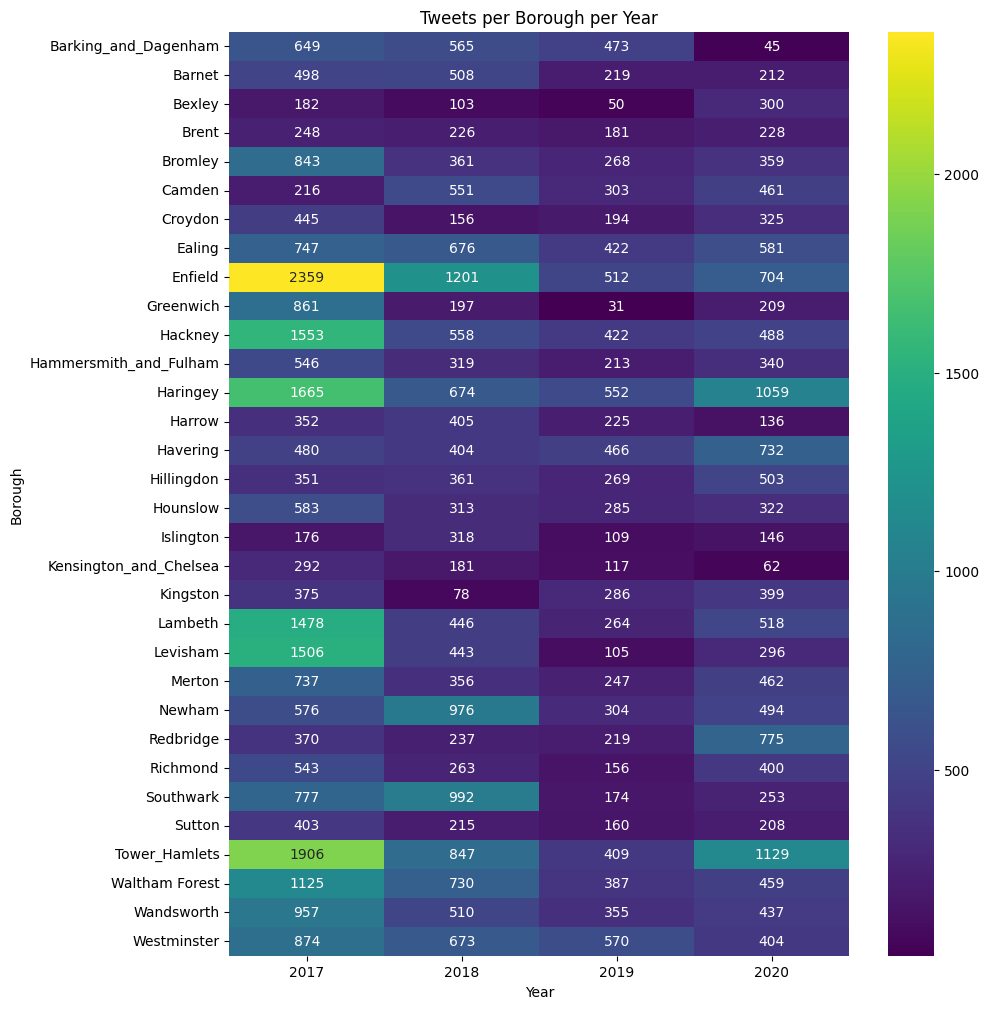

In [1070]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot_df = df_twitter.pivot_table(index='Borough', columns='year', aggfunc='size', fill_value=0)

# Now, use seaborn to create a heatmap
plt.figure(figsize=(10, 12))  # Adjust the size as necessary
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt='d')  # `fmt='d'` ensures number formatting as integers
plt.title('Tweets per Borough per Year')
plt.xlabel('Year')
plt.ylabel('Borough')
plt.yticks(rotation=0)  # Keep borough names horizontal for better readability
plt.savefig('heatmap_tweets_year_borough.jpeg', dpi=600, bbox_inches='tight')
plt.show()

In [1094]:
df_twitter_followers = pd.read_csv('/Users/giacomograzia/Desktop/TimeLog_DC2_Group3.csv',sep=';', usecols=['Borough', 'Social media', 'Followers 2024', 'twitter Account creation'])

df_census_2016 = pd.read_csv('london-borough-profiles-2016 Data set.csv', usecols=['New code', 'Area name', 'GLA Population Estimate 2016'])
df_census_2016.rename({'Area name':'Borough'},axis=1, inplace=True)

In [1095]:
df_census_2016

New code                 Borough GLA Population Estimate 2016
0         NaN                     NaN                          NaN
1   E09000001          City of London                       8,548 
2   E09000002    Barking and Dagenham                     205,773 
3   E09000003                  Barnet                     385,108 
4   E09000004                  Bexley                     243,303 
5   E09000005                   Brent                     328,568 
6   E09000006                 Bromley                     326,560 
7   E09000007                  Camden                     240,595 
8   E09000008                 Croydon                     383,408 
9   E09000009                  Ealing                     348,533 
10  E09000010                 Enfield                     330,968 
11  E09000011               Greenwich                     275,868 
12  E09000012                 Hackney                     270,912 
13  E09000013  Hammersmith and Fulham                     183,354 
14  E09000014                Haringey                     274,803 
15  E09000015                  Harrow                     250,703 
16  E09000016                Havering                     251,611 
17  E09000017              Hillingdon                     299,474 
18  E09000018                Hounslow                     272,102 
19  E09000019               Islington                     228,397 
20  E09000020  Kensington and Chelsea                     158,447 
21  E09000021    Kingston upon Thames                     173,853 
22  E09000022                 Lambeth                     325,455 
23  E09000023                Lewisham                     299,817 
24  E09000024                  Merton                     207,141 
25  E09000025                  Newham                     337,378 
26  E09000026               Redbridge                     301,022 
27  E09000027    Richmond upon Thames                     196,602 
28  E09000028               Southwark                     310,642 
29  E09000029                  Sutton                     201,751 
30  E09000030           Tower Hamlets                     297,805 
31  E09000031          Waltham Forest                     274,139 
32  E09000032              Wandsworth                     318,253 
33  E09000033             Westminster                     239,862 
34  E13000001            Inner London                    3,494,269
35  E13000002            Outer London                    5,256,484
36  E12000007                  London                    8,750,753
37  E92000001                 England                   54,316,618
38  K02000001          United Kingdom                   64,596,752
39        NaN     National comparator                   54,316,618

In [1087]:
df_twitter_followers = df_twitter_followers[df_twitter_followers['Social media']== 'Twitter']

In [1114]:
new_df = pd.merge(df_twitter_followers, df_census_2016, on='Borough')
new_df.dropna(inplace=True)
new_df['GLA Population Estimate 2016'] = new_df['GLA Population Estimate 2016'].str.replace(',', '').astype(int)
new_df['ratio_followers_population'] = new_df['Followers 2024'] / new_df['GLA Population Estimate 2016']
new_df

Borough Social media  Followers 2024  \
0     Barking and Dagenham      Twitter         19700.0   
2                   Barnet      Twitter         38400.0   
4                   Bexley      Twitter         20300.0   
6                    Brent      Twitter         18700.0   
8                  Bromley      Twitter         22100.0   
11                  Camden      Twitter         49100.0   
14                 Croydon      Twitter         22700.0   
16                  Ealing      Twitter         32500.0   
19                 Enfield      Twitter         26800.0   
20               Greenwich      Twitter         21400.0   
22                 Hackney      Twitter         75900.0   
24  Hammersmith and Fulham      Twitter         20100.0   
26                Haringey      Twitter         21400.0   
28                  Harrow      Twitter         37700.0   
31                Havering      Twitter         15100.0   
33              Hillingdon      Twitter         19300.0   
35                Hounslow      Twitter         30500.0   
38               Islington      Twitter         37100.0   
40  Kensington and Chelsea      Twitter         15700.0   
41    Kingston upon Thames      Twitter         21900.0   
44                 Lambeth      Twitter         51700.0   
46                Lewisham      Twitter         37300.0   
48                  Merton      Twitter         15800.0   
51                  Newham      Twitter         19500.0   
53               Redbridge      Twitter         15700.0   
55    Richmond upon Thames      Twitter         17800.0   
58               Southwark      Twitter         21300.0   
59                  Sutton      Twitter         37900.0   
63           Tower Hamlets      Twitter         32900.0   
65          Waltham Forest      Twitter         23900.0   
68              Wandsworth      Twitter         42600.0   
70             Westminster      Twitter         38200.0   

   twitter Account creation   New code  GLA Population Estimate 2016  \
0                    Feb/12  E09000002                        205773   
2                    Dec/11  E09000003                        385108   
4                    Sep/11  E09000004                        243303   
6                    Feb/12  E09000005                        328568   
8                    Feb/12  E09000006                        326560   
11                   Aug/11  E09000007                        240595   
14                   Feb/12  E09000008                        383408   
16                   Feb/12  E09000009                        348533   
19                   Feb/12  E09000010                        330968   
20                   Feb/12  E09000011                        275868   
22                   Feb/12  E09000012                        270912   
24                   Nov/11  E09000013                        183354   
26                   Nov/11  E09000014                        274803   
28                   Aug/11  E09000015                        250703   
31                   Feb/12  E09000016                        251611   
33                   Feb/12  E09000017                        299474   
35                   Feb/12  E09000018                        272102   
38                   Dec/12  E09000019                        228397   
40                   Feb/12  E09000020                        158447   
41                   Feb/12  E09000021                        173853   
44                   Feb/12  E09000022                        325455   
46                   Feb/12  E09000023                        299817   
48                   Feb/12  E09000024                        207141   
51                   Feb/12  E09000025                        337378   
53                   Dec/11  E09000026                        301022   
55                   Feb/12  E09000027                        196602   
58                   Aug/11  E09000028                        310642   
59                   Feb/12  E09000029                 

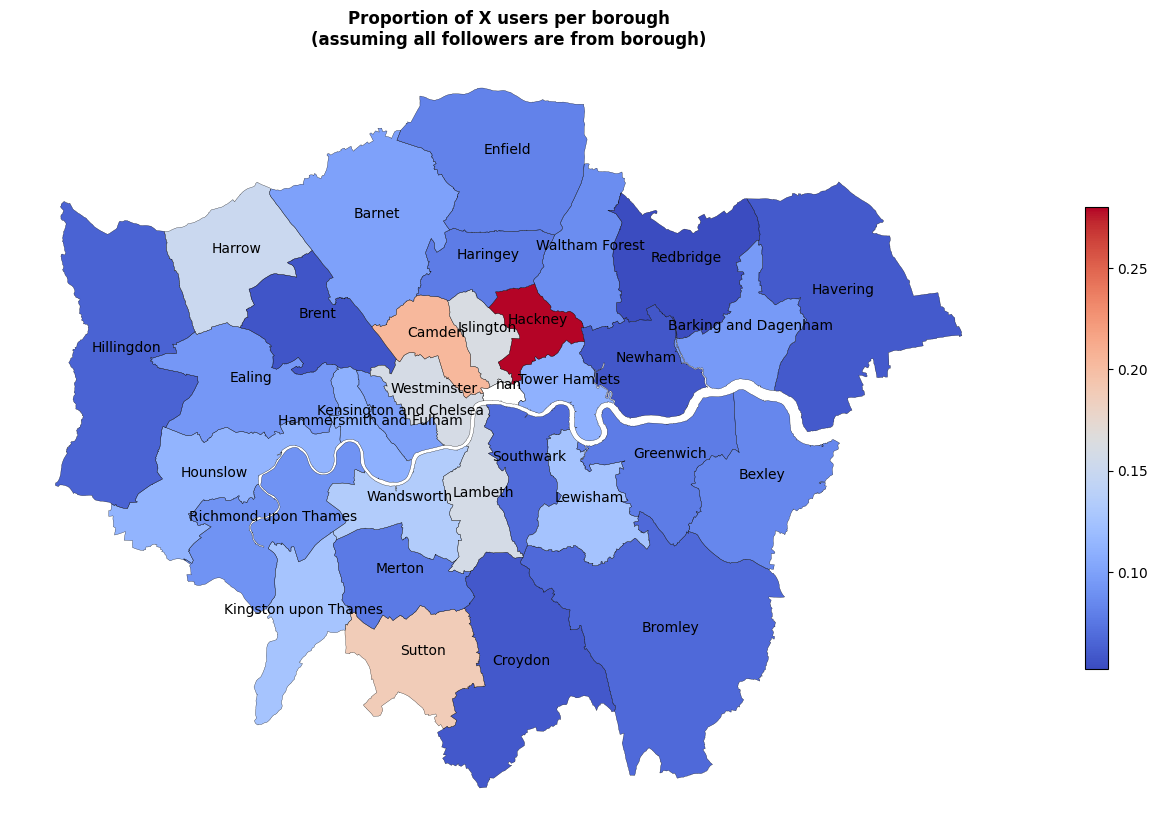

In [1129]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'shape' is a GeoDataFrame with the geometry of each borough
# and 'new_df' contains the data to be merged including 'Borough' and 'Followers 2024'

# Merge your shapefile GeoDataFrame with the new data
shape_ = pd.merge(
    left=shape,
    right=new_df,
    left_on='NAME',  # shape borough column name
    right_on='Borough',  # df column name
    how='left'
)

# Plot the boundaries of boroughs
ax = shape_.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(20,10))

# Plot the logged data
shape_.plot(ax=ax, 
            column='ratio_followers_population',  # Assume this column exists after some operations
            legend=True, 
            cmap='coolwarm',
            legend_kwds={'shrink':0.6})

# Remove the axes as they are not meaningful
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Hide the box around the plot
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

# Set the title
ax.set_title('Proportion of X users per borough\n(assuming all followers are from borough)', weight='bold')

# Calculate the centroids of each borough and add annotations
shape_['centroid'] = shape_.geometry.centroid
for idx, row in shape_.iterrows():
    ax.annotate(text=row['Borough'], xy=(row['centroid'].x, row['centroid'].y), 
                xytext=(3, 3), textcoords="offset points", ha='center', color='black')  # Example: text color set to blue

# Save the plot
plt.savefig('Proportion of X users per borough.jpeg', dpi=600)
plt.show()


## Not used code

### Crime data exploration and Crime Data chropleth map

### Crime Data Regression (1)

In [23]:
df_borough.head()

Crime ID    Month  Longitude  \
0  a844d2986672f8e7141424e629e3b45dcccae1143bdded...  2013-01  -0.207076   
1  750a65e3f0c580fb801c6589ae8fa8ca9ee3b92022de33...  2013-01  -0.203552   
2  21938f414ed8b80c3a02b659832702736a595a541d5574...  2013-01  -0.213284   
3  38a2922207338b6ff65203c3c292371402925a9651e2ea...  2013-01  -0.212671   
4  f371041d2c50c8a37c96dbdb736c77a9649d2770b35c1e...  2013-01  -0.213284   

    Latitude                       Location  LSOA code  \
0  51.492838  On or near NORTH END CRESCENT  E01001870   
1  51.491597       On or near Shopping Area  E01001870   
2  51.491764        On or near GLIDDON ROAD  E01001871   
3  51.493427         On or near AURIOL ROAD  E01001871   
4  51.491764        On or near GLIDDON ROAD  E01001871   

                                    Outcome type                    LSOA_Name  \
0      Offender given a drugs possession warning  Hammersmith and Fulham 012D   
1  Investigation complete; no suspect identified  Hammersmith and Fulham 012D   
2  Investigation complete; no suspect identified  Hammersmith and Fulham 012E   
3                                Suspect charged  Hammersmith and Fulham 012E   
4  Investigation complete; no suspect identified  Hammersmith and Fulham 012E   

              BoroughName  
0  Hammersmith and Fulham  
1  Hammersmith and Fulham  
2  Hammersmith and Fulham  
3  Hammersmith and Fulham  
4  Hammersmith and Fulham

In [12]:
df_borough = pd.read_csv('2013-2024/metropolitan_outcomes_data_with-boroughs.csv')
df_borough.drop('Unnamed: 0', inplace=True, axis=1)

In [24]:
df_borough['Month'] = pd.to_datetime(df_borough['Month'], format='%Y-%m')

df_borough['Year'] = df_borough['Month'].dt.year

In [28]:
df_borough.head(1)

Crime ID      Month  Longitude  \
0  a844d2986672f8e7141424e629e3b45dcccae1143bdded... 2013-01-01  -0.207076   

    Latitude                       Location  LSOA code  \
0  51.492838  On or near NORTH END CRESCENT  E01001870   

                                Outcome type                    LSOA_Name  \
0  Offender given a drugs possession warning  Hammersmith and Fulham 012D   

              BoroughName  Year  
0  Hammersmith and Fulham  2013

In [33]:
df_grouped = df_borough.groupby(['BoroughName', 'Outcome type', 'Year'], ).size()

In [105]:
df_grouped

BoroughName           Outcome type                             Year
Barking and Dagenham  Court case unable to proceed             2013    26
                                                               2015     3
                                                               2016     3
                                                               2017     2
                                                               2018     8
                                                                       ..
Westminster           Suspect charged as part of another case  2017     2
                                                               2022     2
                                                               2023     2
                      Unable to prosecute suspect              2013     3
                                                               2014     2
Length: 4703, dtype: int64

In [101]:
df_grouped_outcome_year = df_borough.groupby(['BoroughName', 'Outcome type', 'Year']).size().reset_index(name='Count')
df_grouped_outcome_year.head(5)

BoroughName                  Outcome type  Year  Count
0  Barking and Dagenham  Court case unable to proceed  2013     26
1  Barking and Dagenham  Court case unable to proceed  2015      3
2  Barking and Dagenham  Court case unable to proceed  2016      3
3  Barking and Dagenham  Court case unable to proceed  2017      2
4  Barking and Dagenham  Court case unable to proceed  2018      8

In [151]:
# here we have crime counts grouped per borough and year.
# we can make one model per year, 

df_2014 = df_grouped_outcome_year[df_grouped_outcome_year.Year==2014]
df_2014 = df_2014.rename({'BoroughName':'Borough'}, axis=1)
df_2014

Borough                                   Outcome type  \
7     Barking and Dagenham                     Defendant found not guilty   
16    Barking and Dagenham  Investigation complete; no suspect identified   
28    Barking and Dagenham                               Local resolution   
45    Barking and Dagenham                                 Offender fined   
52    Barking and Dagenham                       Offender given a caution   
...                    ...                                            ...   
4671           Westminster                  Offender otherwise dealt with   
4676           Westminster                        Offender sent to prison   
4683           Westminster                                Suspect charged   
4695           Westminster        Suspect charged as part of another case   
4702           Westminster                    Unable to prosecute suspect   

      Year  Count  
7     2014      1  
16    2014   7212  
28    2014    114  
45    2014      5  
52    2014    854  
...    ...    ...  
4671  2014      4  
4676  2014     81  
4683  2014   3884  
4695  2014     27  
4702  2014      2  

[524 rows x 4 columns]

In [152]:
pivot_df_2014 = df_2014.pivot_table(index='Borough', columns='Outcome type', values='Count', fill_value=0)
pivot_df_2014

# THIS IS 2013 only, would be one model
# columns are the crime outcomes
# rows are boroughs

# why?
# say we see that a certain crime type/outcome is particularly relevant in determining trust and confidence in the police
# that migh be because of:
## A) the crime itself makes people feel unsafe
## B) the way the crime is handeled by the police (how police works) does not make people trust the police

Outcome type            Court case unable to proceed  \
Borough                                                
Barking and Dagenham                             0.0   
Barnet                                           4.0   
Bexley                                           1.0   
Brent                                            5.0   
Bromley                                          2.0   
Camden                                           2.0   
City of London                                   0.0   
Croydon                                          1.0   
Ealing                                           6.0   
Enfield                                          3.0   
Greenwich                                        1.0   
Hackney                                          1.0   
Hammersmith and Fulham                           5.0   
Haringey                                         2.0   
Harrow                                           3.0   
Havering                                         1.0   
Hillingdon                                       6.0   
Hounslow                                         1.0   
Islington                                        3.0   
Kensington and Chelsea                           4.0   
Kingston upon Thames                             1.0   
Lambeth                                          5.0   
Lewisham                                         3.0   
Merton                                           2.0   
Newham                                           2.0   
Redbridge                                        8.0   
Richmond upon Thames                             1.0   
Southwark                                        5.0   
Sutton                                           1.0   
Tower Hamlets                                    3.0   
Waltham Forest                                   2.0   
Wandsworth                                       3.0   
Westminster                                     12.0   

Outcome type            Defendant found not guilty  \
Borough                                              
Barking and Dagenham                           1.0   
Barnet                                         5.0   
Bexley                                         8.0   
Brent                                          5.0   
Bromley                                        2.0   
Camden                                         5.0   
City of London                                 0.0   
Croydon                                       12.0   
Ealing                                         7.0   
Enfield                                        1.0   
Greenwich                                     12.0   
Hackney                                        4.0   
Hammersmith and Fulham                         3.0   
Haringey                                       0.0   
Harrow                                         2.0   
Havering                                       0.0   
Hillingdon                                     5.0   
Hounslow                                       4.0   
Islington                                      6.0   
Kensington and Chelsea                         2.0   
Kingston upon Thames                           1.0   
Lambeth                                       15.0   
Lewisham                                      12.0   
Merton                                         1.0   
Newham                                        14.0   
Redbridge                                      3.0   
Richmond upon Thames                           4.0   
Southwark                                     11.0   
Sutton                                         2.0   
Tower Hamlets                                  7.0   
Waltham Forest                                 4.0   
Wandsworth                                     6.0   
Westminster                                    5.0   

Outcome type            Defendant sent to Crown Court  \
Borough                                                 
Barking and Dagenham              

In [155]:
merged_df = pd.merge(pivot_df_2014, pas_df_2014[['Borough', 'Proportion']], on='Borough', how='inner')
merged_df.head()

Borough  Court case unable to proceed  \
0  Barking and Dagenham                           0.0   
1                Barnet                           4.0   
2                Bexley                           1.0   
3                 Brent                           5.0   
4               Bromley                           2.0   

   Defendant found not guilty  Defendant sent to Crown Court  \
0                         1.0                            0.0   
1                         5.0                            0.0   
2                         8.0                            0.0   
3                         5.0                            0.0   
4                         2.0                            0.0   

   Formal action is not in the public interest  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Investigation complete; no suspect identified  Local resolution  \
0                                         7212.0             114.0   
1                                        10860.0             215.0   
2                                         5059.0             129.0   
3                                        11060.0             143.0   
4                                         9072.0             615.0   

   Offender deprived of property  Offender fined  Offender given a caution  \
0                            0.0             5.0                     854.0   
1                            0.0            12.0                     775.0   
2                            0.0             6.0                     636.0   
3                            4.0             7.0                    1060.0   
4                            0.0             6.0                    1000.0   

   Offender given a drugs possession warning  \
0                                      325.0   
1                                      313.0   
2                                      264.0   
3                                      895.0   
4                                      311.0   

   Offender given absolute discharge  Offender given community sentence  \
0                                0.0                                3.0   
1                                0.0                                9.0   
2                                0.0                                4.0   
3                                0.0                               10.0   
4                                0.0                                9.0   

   Offender given conditional discharge  Offender given penalty notice  \
0                                   3.0                          133.0   
1                                   3.0                          324.0   
2                                   2.0                          110.0   
3                                   8.0                          503.0   
4                                   3.0                          231.0   

   Offender given suspended prison sentence  \
0                                       3.0   
1                                       4.0   
2                                       1.0   
3                                       4.0   
4                                       6.0   

   Offender ordered to pay compensation  Offender otherwise dealt with  \
0                                   0.0                            1.0   
1                                   0.0                            1.0   
2                                   0.0                            0.0   
3                                   0.0                            1.0   
4                                   0.0                            1.0   

   Offender sent to prison  Suspect charged  \
0                     10.0           1822.0   
1                      8.0           2049.0   
2                      5.0           1243.0

In [208]:


# Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mse)
print("R2 Score:", r2)

Coefficients: [-0.00302396 -0.05141962  0.04061582  0.01531694  0.06540023  0.03997888
  0.00164154 -0.01051349 -0.0988376  -0.02284803 -0.04998359  0.00400513
  0.01259483 -0.0091926  -0.01760954  0.03016923 -0.03713687  0.05861143
  0.01233295 -0.01733971 -0.01023083]
Intercept: 0.6662962962962965
Mean squared error: 0.011854666081648608
R2 Score: -9.3084052883901


In [169]:
model.score(X_train_scaled, y_train)

0.8751271442634988

In [170]:
model.score(X_test_scaled, y_test)

-6.003735070193051

In [218]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = merged_df.loc[:, ~merged_df.columns.isin(['Proportion', 'Borough'])]
y = merged_df['Proportion']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


alpha_space = np.logspace(-4, 2, 50)  # From 10^-4 to 10^2


lasso_grid = GridSearchCV(Lasso(max_iter=int(1e7)), {'alpha': alpha_space}, cv=5, scoring='r2')
ridge_grid = GridSearchCV(Ridge(max_iter=int(1e7)), {'alpha': alpha_space}, cv=5, scoring='r2')


# Fit the grid search
lasso_grid.fit(X_train_scaled, y_train)  # Make sure to use the scaled X and the target y
ridge_grid.fit(X_train_scaled, y_train)

# Best parameters and best scores
print("Best Lasso alpha:", lasso_grid.best_params_)
print("Best Lasso score:", lasso_grid.best_score_)
print("Best Lasso model - score on test:", lasso_grid.score(X_test_scaled, y_test))
print()
print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge score:", ridge_grid.best_score_)
print("Best Ridge model - score on test:", ridge_grid.score(X_test_scaled, y_test))



Best Lasso alpha: {'alpha': 0.003906939937054617}
Best Lasso score: 0.30797878576862664
Best Lasso model - score on test: -0.436336791888269

Best Ridge alpha: {'alpha': 5.963623316594637}
Best Ridge score: 0.013997974343902708
Best Ridge model - score on test: 0.21286036707409417


In [203]:
from sklearn.model_selection import GridSearchCV

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the alpha values to test
alpha_space = np.logspace(-4, 3, 1000)  # Creates 50 values between 10^-4 and 10^2

# Set up the grid search with Lasso and Ridge
lasso_grid = GridSearchCV(Lasso(max_iter=int(1e7)), {'alpha': alpha_space}, cv=5, scoring='r2')
ridge_grid = GridSearchCV(Ridge(max_iter=int(1e7)), {'alpha': alpha_space}, cv=5, scoring='r2')

# Fit the grid search
lasso_grid.fit(X_train_scaled, y_train)
ridge_grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=Ridge(max_iter=10000000),
             param_grid={'alpha': array([1.00000000e-04, 1.01626509e-04, 1.03279473e-04, 1.04959323e-04,
       1.06666496e-04, 1.08401436e-04, 1.10164595e-04, 1.11956432e-04,
       1.13777413e-04, 1.15628013e-04, 1.17508713e-04, 1.19420003e-04,
       1.21362380e-04, 1.23336350e-04, 1.25342427e-04, 1.27381132e-04,
       1.29452998e-04, 1.31558562e-04,...
       6.89983712e+02, 7.01206359e+02, 7.12611543e+02, 7.24202233e+02,
       7.35981448e+02, 7.47952252e+02, 7.60117762e+02, 7.72481145e+02,
       7.85045620e+02, 7.97814457e+02, 8.10790981e+02, 8.23978568e+02,
       8.37380654e+02, 8.51000725e+02, 8.64842328e+02, 8.78909065e+02,
       8.93204600e+02, 9.07732653e+02, 9.22497005e+02, 9.37501502e+02,
       9.52750047e+02, 9.68246612e+02, 9.83995230e+02, 1.00000000e+03])},
             scoring='r2')

In [205]:
lasso_grid.score(X_test_scaled, y_test)

-0.030871141310507166

In [204]:
print("Best Lasso Alpha:", lasso_grid.best_params_)
print("Best Lasso Score:", lasso_grid.best_score_)
print()
print("Best Ridge Alpha:", ridge_grid.best_params_)
print("Best Ridge Score:", ridge_grid.best_score_)


Best Lasso Alpha: {'alpha': 0.02052637752709252}
Best Lasso Score: 0.008782331146374412

Best Ridge Alpha: {'alpha': 262.070669648385}
Best Ridge Score: -0.12926765724305717


In [234]:
# Create the model
model = sm.OLS(y, X)

# Fit the model with L1 regularization (Lasso)
result = model.fit_regularized(method='sqrt_lasso', alpha=6, L1_wt=1)

# Since fit_regularized does not provide a full summary, you must use summary2
print(result.summary)

<bound method Results.summary of <statsmodels.base.elastic_net.RegularizedResults object at 0x392c3e760>>


### metropolitan_outcomes_data.csv

In [2]:
df = pd.read_csv('2013-2024/metropolitan_outcomes_data.csv')

In [3]:
df.head()

Crime ID    Month  Longitude  \
0  a844d2986672f8e7141424e629e3b45dcccae1143bdded...  2013-01  -0.207076   
1  750a65e3f0c580fb801c6589ae8fa8ca9ee3b92022de33...  2013-01  -0.203552   
2  21938f414ed8b80c3a02b659832702736a595a541d5574...  2013-01  -0.213284   
3  38a2922207338b6ff65203c3c292371402925a9651e2ea...  2013-01  -0.212671   
4  f371041d2c50c8a37c96dbdb736c77a9649d2770b35c1e...  2013-01  -0.213284   

    Latitude                       Location  LSOA code  \
0  51.492838  On or near NORTH END CRESCENT  E01001870   
1  51.491597       On or near Shopping Area  E01001870   
2  51.491764        On or near GLIDDON ROAD  E01001871   
3  51.493427         On or near AURIOL ROAD  E01001871   
4  51.491764        On or near GLIDDON ROAD  E01001871   

                     LSOA name                                   Outcome type  
0  Hammersmith and Fulham 012D      Offender given a drugs possession warning  
1  Hammersmith and Fulham 012D  Investigation complete; no suspect identified  
2  Hammersmith and Fulham 012E  Investigation complete; no suspect identified  
3  Hammersmith and Fulham 012E                                Suspect charged  
4  Hammersmith and Fulham 012E  Investigation complete; no suspect identified

In [7]:
df['Outcome type'].value_counts()

Outcome type
Investigation complete; no suspect identified    5367197
Suspect charged                                   647003
Local resolution                                  158351
Offender given a caution                          155204
Offender given a drugs possession warning          92559
Offender sent to prison                            77696
Defendant found not guilty                         70474
Offender given penalty notice                      70036
Offender given community sentence                  61397
Offender fined                                     48593
Offender given suspended prison sentence           33604
Offender given conditional discharge               25425
Court case unable to proceed                       24422
Suspect charged as part of another case             8040
Offender otherwise dealt with                       6288
Offender ordered to pay compensation                3885
Offender deprived of property                       3308
Offender given abs

In [47]:
df.shape # almost 7 mln

(6855314, 8)

In [8]:
df.isna().sum()

Crime ID             0
Month                0
Longitude       138519
Latitude        138519
Location             0
LSOA code       138519
LSOA name       138519
Outcome type         0
dtype: int64

In [26]:
print(f"Missing coordinates in {df.Longitude.isna().sum() / len(df) *100:.2f} % of the data points")

Missing coordinates in 2.02 % of the data points


#### Bar charts

In [64]:
lsoa_count = df['LSOA code'].value_counts()
frequent_lsoa_codes = lsoa_count[lsoa_count > 1000].index
filtered_df = df[df['LSOA code'].isin(frequent_lsoa_codes)]
filtered_df.head(2)

Crime ID    Month  Longitude  \
11  6c7987a14b14d3fa9b38c82db5e0025a5028f48724b0ca...  2013-01  -0.227329   
12  6b5d10255218ec0ed48e0b81be494fc61689c1a497f156...  2013-01  -0.226481   

     Latitude                    Location  LSOA code  \
11  51.519242  On or near NORTH POLE ROAD  E01001874   
12  51.517314    On or near NASCOT STREET  E01001874   

                      LSOA name                             Outcome type  
11  Hammersmith and Fulham 001A  Suspect charged as part of another case  
12  Hammersmith and Fulham 001A  Suspect charged as part of another case

In [80]:
plot_data = filtered_df['LSOA code'].value_counts()

plot_data_ = plot_data.head(50)

filtered_lsoa_names = filtered_df[['LSOA code', 'LSOA name']].drop_duplicates('LSOA code')

result_df = pd.merge(plot_data_, 
                     filtered_lsoa_names, 
                     on='LSOA code', 
                     how='inner')

In [81]:
result_df

LSOA code  count                    LSOA name
0   E01004734  56029             Westminster 018A
1   E01033595  55371             Westminster 013E
2   E01004763  49541             Westminster 013B
3   E01004736  30036             Westminster 018C
4   E01002968  25377    Kingston upon Thames 009C
5   E01002444  25307              Hillingdon 031A
6   E01033583  23525                  Newham 013G
7   E01004714  22900             Westminster 011B
8   E01004735  21633             Westminster 018B
9   E01001943  19704  Hammersmith and Fulham 004A
10  E01033708  17625                 Hackney 027G
11  E01004765  17136             Westminster 013D
12  E01004761  15697             Westminster 018D
13  E01000863  15463                  Camden 021A
14  E01003047  14146                 Lambeth 011B
15  E01000919  13697                  Camden 028D
16  E01033596  13165             Westminster 013F
17  E01003617  12947                  Newham 012B
18  E01035716  11993             Westminster 013G
19  E01000914  11456                  Camden 028B
20  E01003929  11427               Southwark 002B
21  E01003689  10979               Redbridge 030G
22  E01001043  10969                 Croydon 027B
23  E01001898  10949  Hammersmith and Fulham 013C
24  E01002356  10746                Havering 013C
25  E01000010  10565    Barking and Dagenham 015C
26  E01001221  10511                  Ealing 020A
27  E01002704  10474               Islington 023D
28  E01000850  10409                  Camden 026A
29  E01000675  10398                 Bromley 018B
30  E01004142  10046                  Sutton 012D
31  E01001014   9999                 Croydon 024A
32  E01001048   9347                 Croydon 020C
33  E01004750   9182             Westminster 023E
34  E01002026   9127                Haringey 016A
35  E01000918   8990                  Camden 028C
36  E01033083   8930                Hounslow 018F
37  E01004397   8907          Waltham Forest 017C
38  E01003013   8872                 Lambeth 036A
39  E01002129   8808                  Harrow 023C
40  E01004762   8657             Westminster 011E
41  E01003055   8538                 Lambeth 016D
42  E01000854   8454                  Camden 026D
43  E01003521   8382                  Newham 018B
44  E01033706   8340                 Hackney 027F
45  E01004689   8325             Westminster 019C
46  E01004733   8323             Westminster 020C
47  E01004067   8310               Southwark 022E
48  E01003876   8309    Richmond upon Thames 008B
49  E01032741   8206                Havering 013E

<Figure size 1000x600 with 0 Axes>

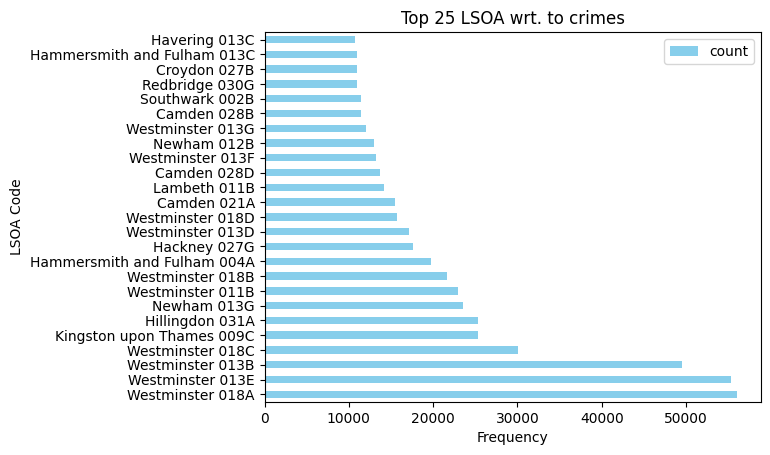

In [88]:
plt.figure(figsize=(10, 6))  

result_df[:25].plot(kind='barh', color='skyblue', x='LSOA name')

plt.ylabel('LSOA Code')
plt.xlabel('Frequency')
plt.title('Top 25 LSOA wrt. to crimes');

In [53]:
df['Outcome type'].unique()

array(['Offender given a drugs possession warning',
       'Investigation complete; no suspect identified', 'Suspect charged',
       'Suspect charged as part of another case',
       'Offender given a caution', 'Offender given penalty notice',
       'Unable to prosecute suspect', 'Local resolution',
       'Offender given conditional discharge',
       'Offender given community sentence', 'Offender sent to prison',
       'Offender fined', 'Offender given suspended prison sentence',
       'Offender ordered to pay compensation',
       'Offender deprived of property', 'Defendant found not guilty',
       'Court case unable to proceed', 'Offender otherwise dealt with',
       'Offender given absolute discharge',
       'Defendant sent to Crown Court',
       'Formal action is not in the public interest'], dtype=object)

In [54]:
len(df['Outcome type'].unique())

21

In [6]:
outcome_counts = df['Outcome type'].value_counts()

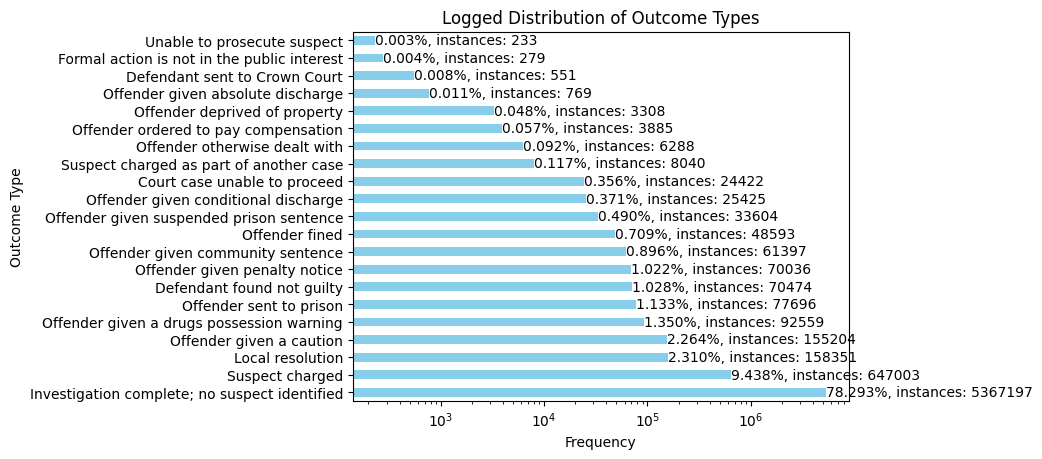

In [29]:
outcome_counts = df['Outcome type'].value_counts()

total_counts = outcome_counts.sum()

ax = outcome_counts.plot(kind='barh', color='skyblue', logx=True)

plt.title('Logged Distribution of Outcome Types')
plt.ylabel('Outcome Type')
plt.xlabel('Frequency')

for index, value in enumerate(outcome_counts):
    plt.text(value, 
             index, 
             f'{(value/total_counts)*100:.3f}%, instances: {value}', 
             va='center')

plt.show()

In [135]:
plot_data = filtered_df['LSOA code'].value_counts()
plot_data

LSOA code
E01004734    56029
E01033595    55371
E01004763    49541
E01004736    30036
E01002968    25377
             ...  
E01003151     1003
E01033729     1003
E01002675     1002
E01001982     1001
E01001588     1001
Name: count, Length: 2269, dtype: int64

### metropolitan_street_data

In [39]:
df2 = pd.read_csv('2013-2024/metropolitan_street_data.csv')

In [49]:
df2.shape # almost 11 mln

(10711783, 9)

In [41]:
cleaned_df = df2.dropna(subset=['Crime ID'])

### intersection of the files

In [43]:
common_elements = np.intersect1d(df['Crime ID'], cleaned_df['Crime ID'])

In [45]:
len(common_elements) # intersection is 5 mln

5414972

### Choropleth map 1

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

To use Geopandas we need a file that describes the shape of the area we want to plot on. 

I found it here: https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london

file name: `statistical-gis-boundaries-london.zip`  (27.34 MB)

The file we need from this folder of geographical data is the one with extension .shp. I load it here below.

The `shape` variable contains a geopandas dataframe (same as a pandas one, with some geopandas specificities). What we care about is the column `LSOA11CD` which contains the code of the LSOA (same as the one on our crime data file, column `LSOA Code`).

If we join the value count dataframe of the crime data and the shape df on this commmon column we have all we need to plot things.

In [5]:
shape_path = 'Shapefiles/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp'

In [6]:
shape = gpd.read_file(shape_path) # just a dataframe under the hood

shape.head() # first column represents LSOA CODE

LSOA11CD                   LSOA11NM   MSOA11CD                  MSOA11NM  \
0  E01000001        City of London 001A  E02000001        City of London 001   
1  E01000002        City of London 001B  E02000001        City of London 001   
2  E01000003        City of London 001C  E02000001        City of London 001   
3  E01000005        City of London 001E  E02000001        City of London 001   
4  E01000006  Barking and Dagenham 016A  E02000017  Barking and Dagenham 016   

     LAD11CD               LAD11NM    RGN11CD RGN11NM  USUALRES  HHOLDRES  \
0  E09000001        City of London  E12000007  London      1465      1465   
1  E09000001        City of London  E12000007  London      1436      1436   
2  E09000001        City of London  E12000007  London      1346      1250   
3  E09000001        City of London  E12000007  London       985       985   
4  E09000002  Barking and Dagenham  E12000007  London      1703      1699   

   COMESTRES  POPDEN  HHOLDS  AVHHOLDSZ  \
0          0   112.9     876        1.7   
1          0    62.9     830        1.7   
2         96   227.7     817        1.5   
3          0    52.0     467        2.1   
4          4   116.2     543        3.1   

                                            geometry  
0  POLYGON ((532105.092 182011.230, 532162.491 18...  
1  POLYGON ((532746.813 181786.891, 532671.688 18...  
2  POLYGON ((532135.145 182198.119, 532158.250 18...  
3  POLYGON ((533807.946 180767.770, 533649.063 18...  
4  POLYGON ((545122.049 184314.931, 545271.917 18...

In [191]:
plot_data = df['LSOA code'].value_counts()
plot_data

LSOA code
E01004734    56029
E01033595    55371
E01004763    49541
E01004736    30036
E01002968    25377
             ...  
E01030836        1
E01013687        1
E01005106        1
E01009393        1
E01017444        1
Name: count, Length: 9713, dtype: int64

In [192]:
shape_new = pd.merge(
    left=shape,
    right=plot_data,
    left_on='LSOA11CD', # shape column name
    right_on='LSOA code', # df column name
    how='left' #we only want to plot LSOA's for which we have data
)

In [193]:
shape_new.columns

Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM',
       'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN',
       'HHOLDS', 'AVHHOLDSZ', 'geometry', 'count'],
      dtype='object')

In [194]:
shape_new.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LSOA11CD   4835 non-null   object  
 1   LSOA11NM   4835 non-null   object  
 2   MSOA11CD   4835 non-null   object  
 3   MSOA11NM   4835 non-null   object  
 4   LAD11CD    4835 non-null   object  
 5   LAD11NM    4835 non-null   object  
 6   RGN11CD    4835 non-null   object  
 7   RGN11NM    4835 non-null   object  
 8   USUALRES   4835 non-null   int64   
 9   HHOLDRES   4835 non-null   int64   
 10  COMESTRES  4835 non-null   int64   
 11  POPDEN     4835 non-null   float64 
 12  HHOLDS     4835 non-null   int64   
 13  AVHHOLDSZ  4835 non-null   float64 
 14  geometry   4835 non-null   geometry
 15  count      4834 non-null   float64 
dtypes: float64(3), geometry(1), int64(4), object(8)
memory usage: 604.5+ KB


In [195]:
shape_new.isna().sum()

LSOA11CD     0
LSOA11NM     0
MSOA11CD     0
MSOA11NM     0
LAD11CD      0
LAD11NM      0
RGN11CD      0
RGN11NM      0
USUALRES     0
HHOLDRES     0
COMESTRES    0
POPDEN       0
HHOLDS       0
AVHHOLDSZ    0
geometry     0
count        1
dtype: int64

In [197]:
# log counts
shape_clean = shape_new
shape_clean['count_log'] = np.log(shape_clean['count'])

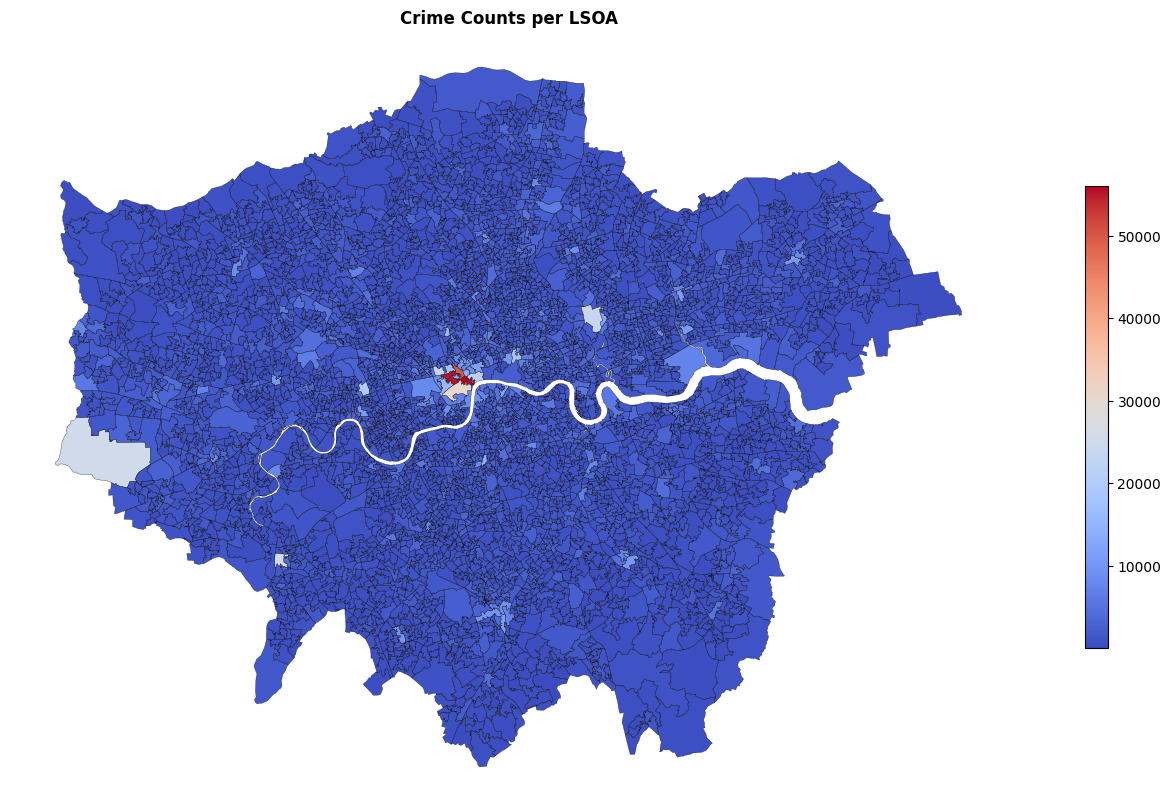

In [201]:
# plot 1

ax = shape_clean.boundary.plot(edgecolor='black', 
                             linewidth=0.2, 
                             figsize=(20,10))
shape_clean.plot(ax=ax, 
                 column='count', # NON-LOGGED
                 legend=True, 
                 cmap='coolwarm',
                 legend_kwds={'shrink':0.6}) # extras: legend_kwds={'shrink':1, 'orientation':'horizontal'}

# to remove the axis cause they don't mean much
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('Crime Counts per LSOA', weight='bold')

plt.savefig('Crime Counts per LSOA.jpeg', dpi=600)
plt.show()

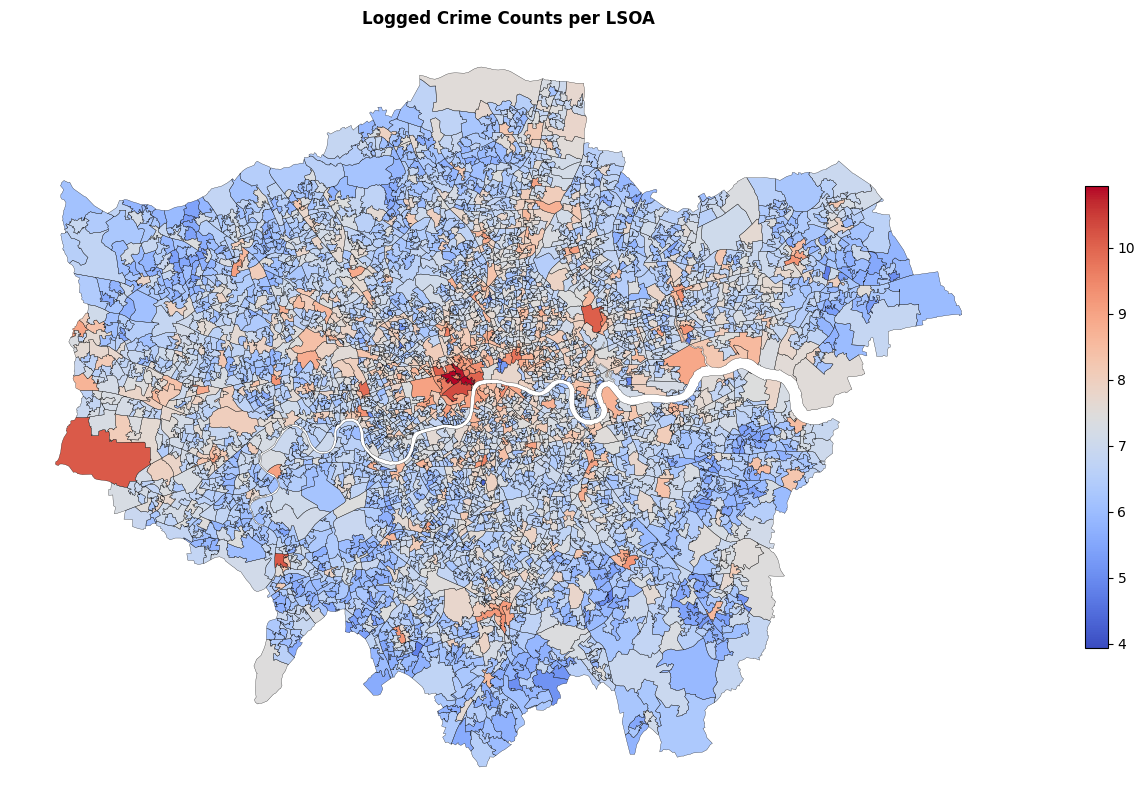

In [200]:
# plot 2

ax = shape_clean.boundary.plot(edgecolor='black', 
                             linewidth=0.2, 
                             figsize=(20,10))
shape_clean.plot(ax=ax, 
                 column='count_log', # LOGGED DATA
                 legend=True, 
                 cmap='coolwarm',
                 legend_kwds={'shrink':0.6}) # extras: legend_kwds={'shrink':1, 'orientation':'horizontal'}

# to remove the axis cause they don't mean much
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('Logged Crime Counts per LSOA', weight='bold')

plt.savefig('Logged Crime Counts per LSOA.jpeg', dpi=600)
plt.show()

### Choropleth 2: crime data per borough

#### Chropleth

In [1116]:
shape_path = 'Shapefiles/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'

shape = gpd.read_file(shape_path) # just a dataframe under the hood

shape.head() # first column represents LSOA CODE

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F     None   
1               Croydon  E09000008   8649.441       0.000         F     None   
2               Bromley  E09000006  15013.487       0.000         F     None   
3              Hounslow  E09000018   5658.541      60.755         F     None   
4                Ealing  E09000009   5554.428       0.000         F     None   

  SUB_2006                                           geometry  
0     None  POLYGON ((516401.600 160201.800, 516407.300 16...  
1     None  POLYGON ((535009.200 159504.700, 535005.500 15...  
2     None  POLYGON ((540373.600 157530.400, 540361.200 15...  
3     None  POLYGON ((521975.800 178100.000, 521967.700 17...  
4     None  POLYGON ((510253.500 182881.600, 510249.900 18...

In [36]:
df_borough = pd.read_csv('2013-2024/metropolitan_outcomes_data_with-boroughs.csv')
df_borough.head()

Unnamed: 0                                           Crime ID    Month  \
0           0  a844d2986672f8e7141424e629e3b45dcccae1143bdded...  2013-01   
1           1  750a65e3f0c580fb801c6589ae8fa8ca9ee3b92022de33...  2013-01   
2           2  21938f414ed8b80c3a02b659832702736a595a541d5574...  2013-01   
3           3  38a2922207338b6ff65203c3c292371402925a9651e2ea...  2013-01   
4           4  f371041d2c50c8a37c96dbdb736c77a9649d2770b35c1e...  2013-01   

   Longitude   Latitude                       Location  LSOA code  \
0  -0.207076  51.492838  On or near NORTH END CRESCENT  E01001870   
1  -0.203552  51.491597       On or near Shopping Area  E01001870   
2  -0.213284  51.491764        On or near GLIDDON ROAD  E01001871   
3  -0.212671  51.493427         On or near AURIOL ROAD  E01001871   
4  -0.213284  51.491764        On or near GLIDDON ROAD  E01001871   

                                    Outcome type                    LSOA_Name  \
0      Offender given a drugs possession warning  Hammersmith and Fulham 012D   
1  Investigation complete; no suspect identified  Hammersmith and Fulham 012D   
2  Investigation complete; no suspect identified  Hammersmith and Fulham 012E   
3                                Suspect charged  Hammersmith and Fulham 012E   
4  Investigation complete; no suspect identified  Hammersmith and Fulham 012E   

              BoroughName  
0  Hammersmith and Fulham  
1  Hammersmith and Fulham  
2  Hammersmith and Fulham  
3  Hammersmith and Fulham  
4  Hammersmith and Fulham

In [58]:
df_plot = df_borough.BoroughName.value_counts()

In [59]:
df_plot = df_plot.to_frame(name='count').reset_index()
df_plot.columns = ['BoroughName', 'count']

In [60]:
df_plot

BoroughName   count
0              Westminster  414348
1                  Lambeth  227720
2                Southwark  220790
3                   Newham  214413
4                   Camden  212567
5                  Croydon  208887
6            Tower Hamlets  206991
7                  Hackney  194592
8                   Ealing  192755
9                    Brent  188702
10               Islington  183458
11                Haringey  182554
12                 Enfield  178541
13                Lewisham  177266
14                  Barnet  173860
15              Hillingdon  173726
16               Greenwich  166391
17              Wandsworth  159797
18                Hounslow  159746
19          Waltham Forest  151565
20               Redbridge  150958
21                 Bromley  148804
22  Hammersmith and Fulham  140599
23  Kensington and Chelsea  136540
24    Barking and Dagenham  124117
25                Havering  118689
26                  Bexley   97446
27                  Harrow   93324
28                  Merton   87168
29                  Sutton   79997
30    Kingston upon Thames   77248
31    Richmond upon Thames   75930
32          City of London    3857

In [61]:
shape_new = pd.merge(
    left=shape,
    right=df_plot,
    left_on='NAME', # shape borough column name
    right_on='BoroughName', # df column name
    how='left' 
)

In [62]:
# log counts
shape_clean = shape_new
shape_clean['count_log'] = np.log(shape_clean['count'])

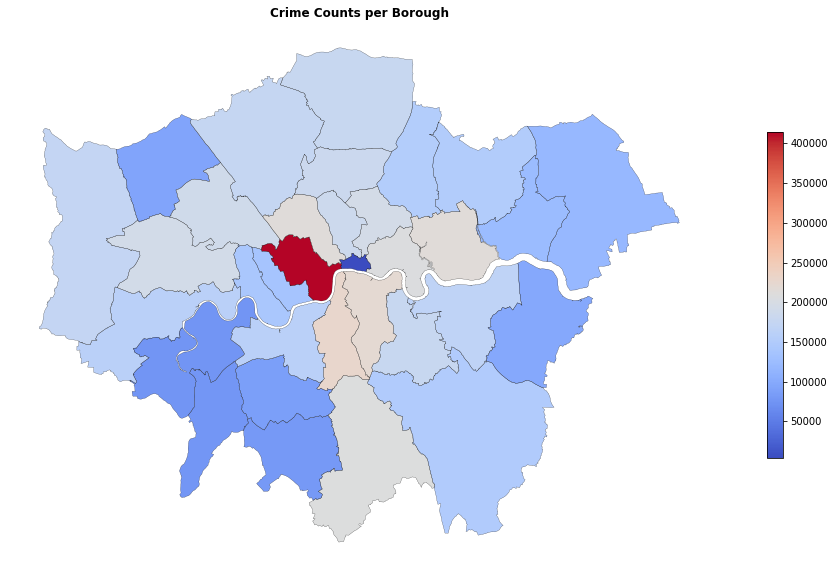

In [65]:
# plot 1

ax = shape_clean.boundary.plot(edgecolor='black', 
                             linewidth=0.2, 
                             figsize=(20,10))
shape_clean.plot(ax=ax, 
                 column='count', # NON-LOGGED
                 legend=True, 
                 cmap='coolwarm',
                 legend_kwds={'shrink':0.6}) # extras: legend_kwds={'shrink':1, 'orientation':'horizontal'}

# to remove the axis cause they don't mean much
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('Crime Counts per Borough', weight='bold')

plt.savefig('Crime Counts per Borough.jpeg', dpi=600)
plt.show()

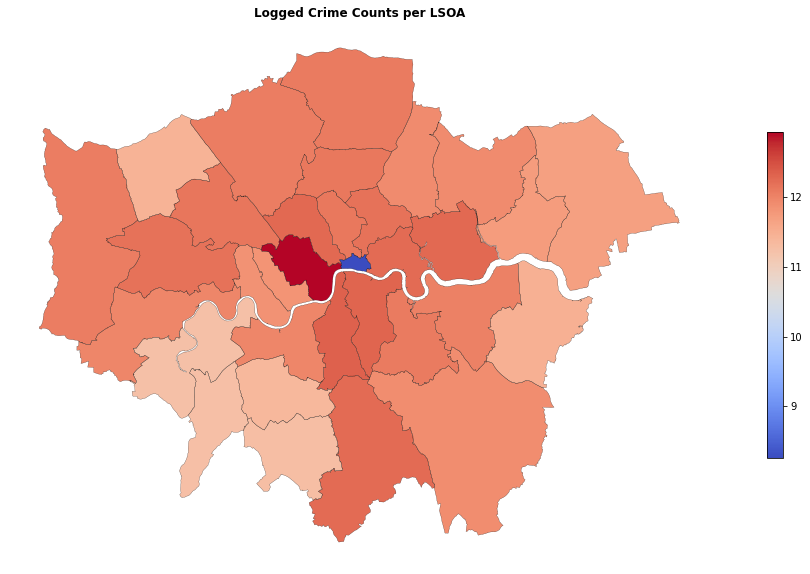

In [66]:
# plot 2

ax = shape_clean.boundary.plot(edgecolor='black', 
                             linewidth=0.2, 
                             figsize=(20,10))
shape_clean.plot(ax=ax, 
                 column='count_log', # LOGGED DATA
                 legend=True, 
                 cmap='coolwarm',
                 legend_kwds={'shrink':0.6}) # extras: legend_kwds={'shrink':1, 'orientation':'horizontal'}

# to remove the axis cause they don't mean much
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('Logged Crime Counts per LSOA', weight='bold')

plt.savefig('Logged Crime Counts per Borough.jpeg', dpi=600)
plt.show()

In [25]:
np.linspace(1,15, 15, dtype=int)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

#### recreate data with borough (wrong join, too much space before)

In [4]:
df_borough = pd.read_csv('2013-2024/metropolitan_outcomes_data_with-boroughs.csv')
df_borough

Unnamed: 0                                           Crime ID  \
0                  0  a844d2986672f8e7141424e629e3b45dcccae1143bdded...   
1                  1  a844d2986672f8e7141424e629e3b45dcccae1143bdded...   
2                  2  a844d2986672f8e7141424e629e3b45dcccae1143bdded...   
3                  3  a844d2986672f8e7141424e629e3b45dcccae1143bdded...   
4                  4  750a65e3f0c580fb801c6589ae8fa8ca9ee3b92022de33...   
...              ...                                                ...   
26495095    26495095  25d73b1215921f8f570fa5cfb25afe006163411b23fc0f...   
26495096    26495096  8f733982131cd11b1a6e4d93d9a6a4e66d695bfd3d68c2...   
26495097    26495097  8f733982131cd11b1a6e4d93d9a6a4e66d695bfd3d68c2...   
26495098    26495098  8f733982131cd11b1a6e4d93d9a6a4e66d695bfd3d68c2...   
26495099    26495099  8f733982131cd11b1a6e4d93d9a6a4e66d695bfd3d68c2...   

            Month  Longitude   Latitude                       Location  \
0         2013-01  -0.207076  51.492838  On or near NORTH END CRESCENT   
1         2013-01  -0.207076  51.492838  On or near NORTH END CRESCENT   
2         2013-01  -0.207076  51.492838  On or near NORTH END CRESCENT   
3         2013-01  -0.207076  51.492838  On or near NORTH END CRESCENT   
4         2013-01  -0.203552  51.491597       On or near Shopping Area   
...           ...        ...        ...                            ...   
26495095  2024-01  -0.299881  51.380709        On or near Malvern Road   
26495096  2024-01  -0.301184  51.413811       On or near Walter Street   
26495097  2024-01  -0.301184  51.413811       On or near Walter Street   
26495098  2024-01  -0.301184  51.413811       On or near Walter Street   
26495099  2024-01  -0.301184  51.413811       On or near Walter Street   

          LSOA code                    LSOA name  \
0         E01001870  Hammersmith and Fulham 012D   
1         E01001870  Hammersmith and Fulham 012D   
2         E01001870  Hammersmith and Fulham 012D   
3         E01001870  Hammersmith and Fulham 012D   
4         E01001870  Hammersmith and Fulham 012D   
...             ...                          ...   
26495095  E01002994    Kingston upon Thames 016A   
26495096  E01033569    Kingston upon Thames 004G   
26495097  E01033569    Kingston upon Thames 004G   
26495098  E01033569    Kingston upon Thames 004G   
26495099  E01033569    Kingston upon Thames 004G   

                                           Outcome type   AreaCode  \
0             Offender given a drugs possession warning  E01001870   
1             Offender given a drugs possession warning  E01001870   
2             Offender given a drugs possession warning  E01001870   
3             Offender given a drugs possession warning  E01001870   
4         Investigation complete; no suspect identified  E01001870   
...                                                 ...        ...   
26495095  Investigation complete; no suspect identified  E01002994   
26495096  Investigation complete; no suspect identified  E01033569   
26495097  Investigation complete; no suspect identified  E01033569   
26495098  Investigation complete; no suspect identified  E01033569   
26495099  Investigation complete; no suspect identified  E01033569   

                            LSOA_Name             BoroughName  
0         Hammersmith and Fulham 012D  Hammersmith and Fulham  
1         Hammersmith and Fulham 012D  Hammersmith and Fulham  
2         Hammersmith and Fulham 012D  Hammersmith and Fulham  
3         Hammersmith and Fulham 012D  Hammersmith and Fulham  
4         Hammersmith and Fulham 012D  Hammersmith and Fulham  
...                               ...                     ...  
26495095    Kingston upon Thames 016A    Kingston upon Thames  
26495096    Kingston upon Thames 004G    Kingston upon Thames  
26495097    Kingston upon Thames 004G    Kingston upon Thames  
26495098    Kingston upon Thames 004G    Kingston upon Thames  
26495099    Kingston upon Thames 004G    Kingston 

In [9]:
df_borough.drop_duplicates('Crime ID', inplace=True)

In [12]:
df_borough.columns

Index(['Unnamed: 0', 'Crime ID', 'Month', 'Longitude', 'Latitude', 'Location',
       'LSOA code', 'LSOA name', 'Outcome type', 'AreaCode', 'LSOA_Name',
       'BoroughName'],
      dtype='object')

In [14]:
df_borough.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
df_borough.drop(['LSOA name', 'AreaCode'], axis=1, inplace=True)

In [21]:
df_borough.reset_index(inplace=True)

In [23]:
df_borough.drop('index', axis=1, inplace=True)

In [25]:
df_borough.to_csv('2013-2024/metropolitan_outcomes_data_with-boroughs.csv')

### Line charts crime counts per borough 

In [115]:
df_borough = pd.read_csv('2013-2024/metropolitan_outcomes_data_with-boroughs.csv')

In [116]:
df_borough = df_borough.drop('Unnamed: 0', axis=1)

In [117]:
# set year and month columns
df_borough['year'], df_borough['month'] = df_borough['Month'].str.split('-', 1).str
df_borough

/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_1656/250565762.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_borough['year'], df_borough['month'] = df_borough['Month'].str.split('-', 1).str


Crime ID    Month  \
0        a844d2986672f8e7141424e629e3b45dcccae1143bdded...  2013-01   
1        750a65e3f0c580fb801c6589ae8fa8ca9ee3b92022de33...  2013-01   
2        21938f414ed8b80c3a02b659832702736a595a541d5574...  2013-01   
3        38a2922207338b6ff65203c3c292371402925a9651e2ea...  2013-01   
4        f371041d2c50c8a37c96dbdb736c77a9649d2770b35c1e...  2013-01   
...                                                    ...      ...   
5323341  13cb7accfc6a4720a6bd3c3575700316923e660e50b843...  2024-01   
5323342  53ac09d5d95b9d107cf3c29946a1b3d2c6ed3571156495...  2024-01   
5323343  2c921d53b77d9ae322c5abcf6b565b175125d11c73afdb...  2024-01   
5323344  25d73b1215921f8f570fa5cfb25afe006163411b23fc0f...  2024-01   
5323345  8f733982131cd11b1a6e4d93d9a6a4e66d695bfd3d68c2...  2024-01   

         Longitude   Latitude                        Location  LSOA code  \
0        -0.207076  51.492838   On or near NORTH END CRESCENT  E01001870   
1        -0.203552  51.491597        On or near Shopping Area  E01001870   
2        -0.213284  51.491764         On or near GLIDDON ROAD  E01001871   
3        -0.212671  51.493427          On or near AURIOL ROAD  E01001871   
4        -0.213284  51.491764         On or near GLIDDON ROAD  E01001871   
...            ...        ...                             ...        ...   
5323341  -0.293950  51.407267    On or near Kingsworthy Close  E01002971   
5323342  -0.245693  51.381789  On or near Lower Green Gardens  E01002978   
5323343  -0.297572  51.407680      On or near Fairfield South  E01002964   
5323344  -0.299881  51.380709         On or near Malvern Road  E01002994   
5323345  -0.301184  51.413811        On or near Walter Street  E01033569   

                                          Outcome type  \
0            Offender given a drugs possession warning   
1        Investigation complete; no suspect identified   
2        Investigation complete; no suspect identified   
3                                      Suspect charged   
4        Investigation complete; no suspect identified   
...                                                ...   
5323341  Investigation complete; no suspect identified   
5323342  Investigation complete; no suspect identified   
5323343  Investigation complete; no suspect identified   
5323344  Investigation complete; no suspect identified   
5323345  Investigation complete; no suspect identified   

                           LSOA_Name             BoroughName  year month  
0        Hammersmith and Fulham 012D  Hammersmith and Fulham  2013    01  
1        Hammersmith and Fulham 012D  Hammersmith and Fulham  2013    01  
2        Hammersmith and Fulham 012E  Hammersmith and Fulham  2013    01  
3        Hammersmith and Fulham 012E  Hammersmith and Fulham  2013    01  
4        Hammersmith and Fulham 012E  Hammersmith and Fulham  2013    01  
...                              ...                     ...   ...   ...  
5323341    Kingston upon Thames 005C    Kingston upon Thames  2024    01  
5323342    Kingston upon Thames 015B    Kingston upon Thames  2024    01  
5323343    Kingston upon Thames 005A    Kingston upon Thames  2024    01  
5323344    Kingston upon Thames 016A    Kingston upon Thames  2024    01  
5323345    Kingston upon Thames 004G    Kingston upon Thames  2024    01  

[5323346 rows x 11 columns]

In [118]:
df_borough.columns

Index(['Crime ID', 'Month', 'Longitude', 'Latitude', 'Location', 'LSOA code',
       'Outcome type', 'LSOA_Name', 'BoroughName', 'year', 'month'],
      dtype='object')

In [119]:
df_grouped_borough = df_borough[['Crime ID','BoroughName', 'year']].groupby(['BoroughName', 'year'])

In [120]:
df_grouped_borough.count()

Crime ID
BoroughName          year          
Barking and Dagenham 2013     11334
                     2014     10522
                     2015     11604
                     2016     11667
                     2017      9792
...                             ...
Westminster          2020     17136
                     2021     27748
                     2022     70571
                     2023     81287
                     2024      6031

[396 rows x 1 columns]

In [121]:
df_grouped_borough = df_borough.groupby(['BoroughName', 'year'])['Crime ID'].count().reset_index()
df_grouped_borough

BoroughName  year  Crime ID
0    Barking and Dagenham  2013     11334
1    Barking and Dagenham  2014     10522
2    Barking and Dagenham  2015     11604
3    Barking and Dagenham  2016     11667
4    Barking and Dagenham  2017      9792
..                    ...   ...       ...
391           Westminster  2020     17136
392           Westminster  2021     27748
393           Westminster  2022     70571
394           Westminster  2023     81287
395           Westminster  2024      6031

[396 rows x 3 columns]

In [204]:
ddd = pd.DataFrame({'boroughs':df_grouped_borough.BoroughName.unique()})

In [207]:
ddd.to_csv('boroughs_london.csv', sep=';')

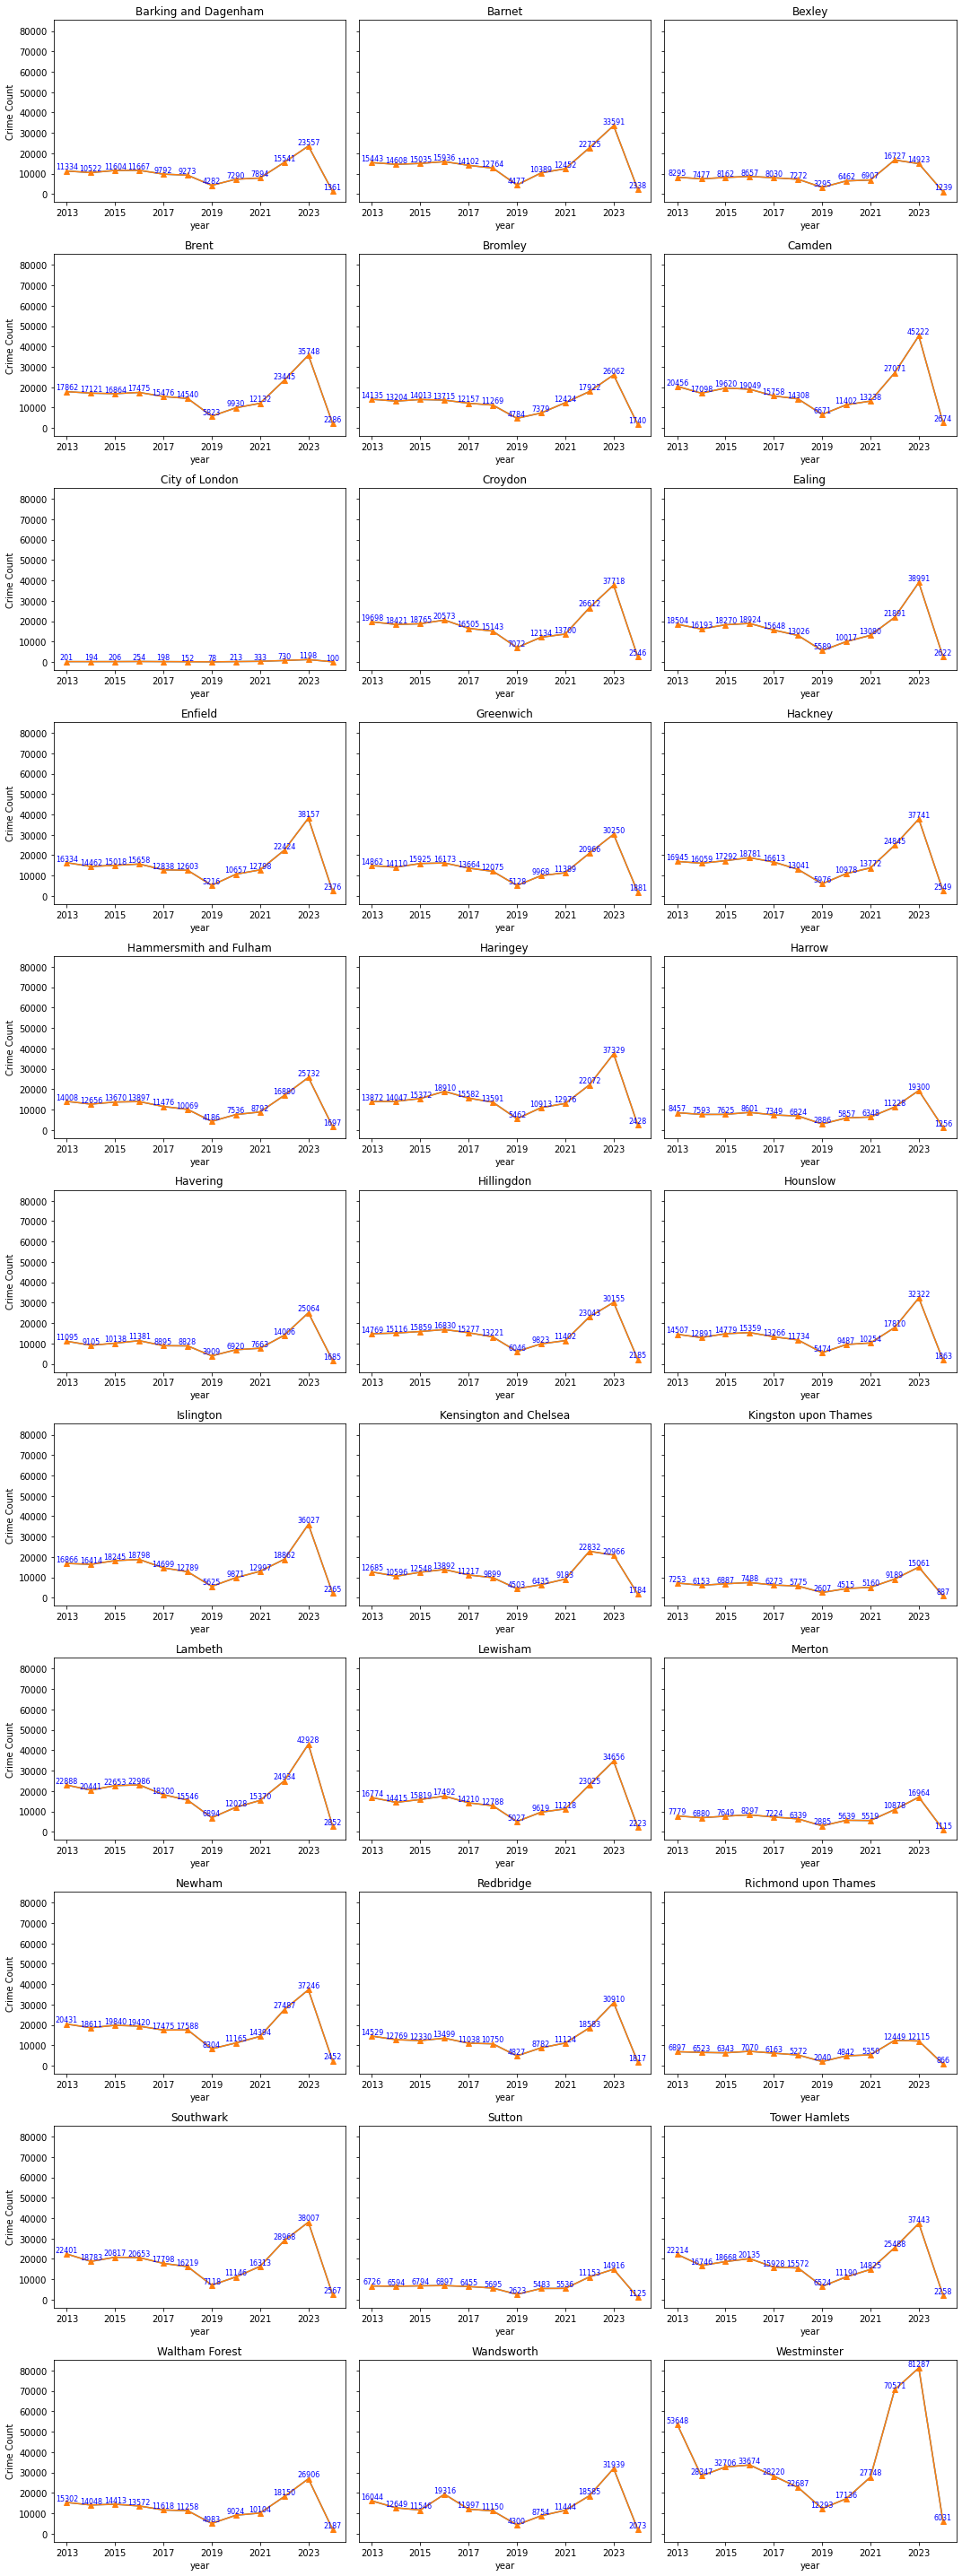

In [137]:
fig, axs = plt.subplots(nrows=11, ncols=3, figsize=(15, 40), sharey=True)
axs = axs.flatten()  

grouped = df_grouped_borough.groupby('BoroughName')

for i, (name, group) in enumerate(grouped):
    group.plot(x='year', y='Crime ID', ax=axs[i], title=name, legend=False)
    axs[i].set_ylabel("Crime Count")
    axs[i].plot(group['year'], group['Crime ID'], marker='^', linestyle='-')
     
    # Annotate each point with its y-value
    for x, y in zip(group['year'], group['Crime ID']):
        axs[i].text(x, y, f'{y}', color='blue', fontsize=8, ha='center', va='bottom')



plt.tight_layout()
plt.savefig('Crimes_per_borough_line_same_Y_annotated.jpg', dpi=600)
plt.show()